In [1]:
import matplotlib.pyplot as plt
from scipy.stats import norm

import sys
sys.path.append('/Users/stephengreenberg/lbnl/phys/NuOscProbExact/src')

import oscprob3nu
import hamiltonians3nu
from globaldefs import *
Pi = np.pi

prefix = 'plots/'

In [2]:
#DEFINE oscillation parameters
#UNITS
eV = 1.000000000
KeV = 10**3*eV
MeV = 10**6*eV
GeV = 10**9*eV

m = 1.000000000
cm = 10**(-2)*m
km = 1e3*m
s = 1.000000000
g = 5.61*(10**32)*eV

class NuNO_nufit_5:
    def __init__(self):
        self.theta_12 = 0.5836      
        self.theta_13 = 0.1496
        self.theta_23 = 0.8552      #sin2(θ23) = 0.546 ± 0.021 (normal ordering!!! different for inverted order)
        self._d_cp = 0.5*Pi                          	#1.36 (+ 0.20 − 0.16) π rad
        self.dM2_21 = 7.42*10**(-5)*(eV**2)          #(7.53 ± 0.18) × 10−5 eV2
        self.dM2_32 = 2.51*10**(-3)*(eV**2)         #(2.453 ± 0.033) × 10−3 eV2 (normal ord_ering!!!)
        self.dM2_31 = (self.dM2_32 + self.dM2_21)
        self.mode = 1                                # +1 neutrino, -1 anti-neutrino
        self.name = 'NO'

    @property
    def d_cp(self):
        return self._d_cp*self.mode

    @d_cp.setter
    def d_cp(self, val):
        self._d_cp = val

class NuNO_nufit_4:
    def __init__(self):
        self.theta_12 = 0.5903       
        self.theta_13 = 0.150
        self.theta_23 = 0.866        #sin2(θ23) = 0.546 ± 0.021 (normal ordering!!! different for inverted order)
        self._d_cp = 0.5*Pi                          	#1.36 (+ 0.20 − 0.16) π rad
        self.dM2_21 = 7.39*10**(-5)*(eV**2)          #(7.53 ± 0.18) × 10−5 eV2
        self.dM2_32 = 2.451*10**(-3)*(eV**2)         #(2.453 ± 0.033) × 10−3 eV2 (normal ord_ering!!!)
        self.dM2_31 = (self.dM2_32 + self.dM2_21)
        self.mode = 1                                # +1 neutrino, -1 anti-neutrino
        self.name = 'NO'

    @property
    def d_cp(self):
        return self._d_cp*self.mode

    @d_cp.setter
    def d_cp(self, val):
        self._d_cp = val

class NuIO_nufit_4:
    def __init__(self):
        self.theta_12 = 0.5903       
        self.theta_13 = 0.151   
        self.theta_23 = 0.869         #sin2(θ23) = 0.546 ± 0.021 (normal ordering!!! different for inverted order)
        self._d_cp = 0.5*Pi                          	#1.36 (+ 0.20 − 0.16) π rad
        self.dM2_21 = 7.39*10**(-5)*(eV**2)          #(7.53 ± 0.18) × 10−5 eV2
        self.dM2_32 = -2.512*10**(-3)*(eV**2)         #(2.453 ± 0.033) × 10−3 eV2 (normal ordering!!!)
        self.dM2_31 = (self.dM2_32 + self.dM2_21)
        self.mode = 1  
        self.name = 'IO'

    @property
    def d_cp(self):
        return self._d_cp*self.mode
    @d_cp.setter
    def d_cp(self, val):
        self._d_cp = val    # +1 neutrino, -1 anti-neutrino
        
#define materials and matter
A_nuc = 12. #mass number for carbon
Z = 6. #atomic number for carbon
class Material:
    def __init__(self, A_nuc, Z, rho):
        self.A_nuc = A_nuc
        self.Z = Z
        self.rho = rho

    def electron_density(self):
        return self.rho*self.Z/(self.A_nuc*m_p)

    def coupling_strength(self):
        return sqrt(2)*G_F*self.electron_density()

class EarthCrust:
    def __init__(self):
        self.N_e =  8488460000.0 # https://arxiv.org/pdf/1707.02322.pdf
    def coupling_strength(self):
        return G_F*self.N_e*sqrt(2)
    
class NuSterile:
	def __init__(self):
		self.theta_12 = 0.5903       
		self.theta_13 = 0.150
		self.theta_23 = 0.866        #sin2(θ23) = 0.546 ± 0.021 (normal ordering!!! different for inverted order)
		self._d_cp = 0.5*Pi                          	#1.36 (+ 0.20 − 0.16) π rad
		self.dM2_21 = 7.39*10**(-5)*(eV**2)          #(7.53 ± 0.18) × 10−5 eV2
		self.dM2_32 = 2.451*10**(-3)*(eV**2)         #(2.453 ± 0.033) × 10−3 eV2 (normal ord_ering!!!)
		self.dM2_31 = (self.dM2_32 + self.dM2_21)
		self.mode = 1                                # +1 neutrino, -1 anti-neutrino
		self.name = 'NO'
		self.OM4 = 1.
		self.a = 0.1
		self.b = 0.1
		self.c = 0.1


	@property
	def d_cp(self):
		return self._d_cp*self.mode

	@d_cp.setter
	def d_cp(self, val):
		self._d_cp = val
        
    
crust = EarthCrust()

In [3]:
#approximate density of the sun is exponential from 1e2 to 1e-2 g/cm^3  
#http://www.sns.ias.edu/~jnb/SNdata/Export/BP2004/bp2004stdmodel.dat
#PHYSICAL CONSTANTS
Avo = 6.022e23
c = 299792458.0 #(m/s)
hbar = 6.582119569*10**(-16) #eV*s
m_p = 938.272088 #MeV
G_F = (1.1663787*(10**(-5)))/GeV**2 #electroweak coupling constant
R_sun = 696340.0 #km

def rho_sun(r):
    return 1e2 * np.exp( (r/R_sun*np.log(1e-4) ) )

##assume 75% hydrogen, 25% helium

def Ne_hydrogen(mass):
    return mass*Avo #number of atoms for mass in g

def Ne_helium(mass):
    return (mass/4.0)*Avo #number of atoms for mass in g

def Ne_sun(mass):
    return Ne_hydrogen(0.75*mass)+Ne_helium(0.25*mass)

def ne_sun(r):
    return Ne_sun(rho_sun(r))

def sun_weak_coupling_strength(r):
    return ne_sun(r)*sqrt(2)*G_F

In [4]:
nu = NuNO_nufit_4()
nu.d_cp = 0
nu_cpv = NuNO_nufit_4()
nu_cpv.d_cp = pi/2
nu_ncpv = NuNO_nufit_4()
nu_ncpv.d_cp = -pi/2

h_vacuum_energy_indep = \
    hamiltonians3nu.hamiltonian_3nu_vacuum_energy_independent(  sin(nu.theta_12),
    sin(nu.theta_23),
    sin(nu.theta_13),
    nu.d_cp,
    nu.dM2_21,
    nu.dM2_31)

h_vacuum_energy_indep_cpv = \
    hamiltonians3nu.hamiltonian_3nu_vacuum_energy_independent(  sin(nu_cpv.theta_12),
    sin(nu_cpv.theta_23),
    sin(nu_cpv.theta_13),
    nu_cpv.d_cp,
    nu_cpv.dM2_21,
    nu_cpv.dM2_31)

h_vacuum_energy_indep_ncpv = \
    hamiltonians3nu.hamiltonian_3nu_vacuum_energy_independent(  sin(nu_ncpv.theta_12),
    sin(nu_ncpv.theta_23),
    sin(nu_ncpv.theta_13),
    nu_ncpv.d_cp,
    nu_ncpv.dM2_21,
    nu_ncpv.dM2_31)

nu_io = NuIO_nufit_4()
nu_io.d_cp = 0
nu_cpv_io = NuIO_nufit_4()
nu_cpv_io.d_cp = pi/2
nu_ncpv_io = NuIO_nufit_4()
nu_cpv_io.d_cp = -pi/2

h_vacuum_energy_indep_io = \
    hamiltonians3nu.hamiltonian_3nu_vacuum_energy_independent(  sin(nu_io.theta_12),
    sin(nu_io.theta_23),
    sin(nu_io.theta_13),
    nu_io.d_cp,
    nu_io.dM2_21,
    nu_io.dM2_31)

h_vacuum_energy_indep_cpv_io = \
    hamiltonians3nu.hamiltonian_3nu_vacuum_energy_independent(  sin(nu_cpv_io.theta_12),
    sin(nu_cpv_io.theta_23),
    sin(nu_cpv_io.theta_13),
    nu_cpv_io.d_cp,
    nu_cpv_io.dM2_21,
    nu_cpv_io.dM2_31)

h_vacuum_energy_indep_ncpv_io = \
    hamiltonians3nu.hamiltonian_3nu_vacuum_energy_independent(  sin(nu_ncpv_io.theta_12),
    sin(nu_ncpv_io.theta_23),
    sin(nu_ncpv_io.theta_13),
    nu_ncpv_io.d_cp,
    nu_ncpv_io.dM2_21,
    nu_ncpv_io.dM2_31)

We want to validate this calculator against our own construction of the calculator, which uses a numerical approach in python. We import the calculator below, and use it in the following cell to make comparison plots to this calculator.

In [5]:
sys.path.append('/Users/stephengreenberg/lbnl/phys/NuOscCalculator')
from Neutrino_Oscillation_Calculator import *
#from Neutrino_Oscillation_Calculator import Neutrino_Oscillation_Calculator_Sterile
from globaldef import *

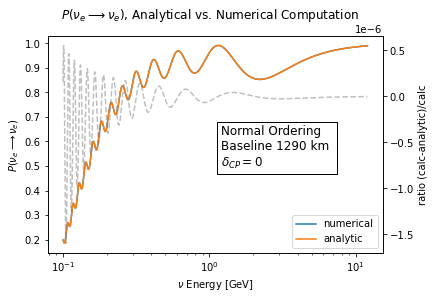

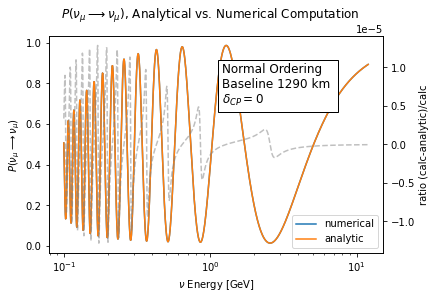

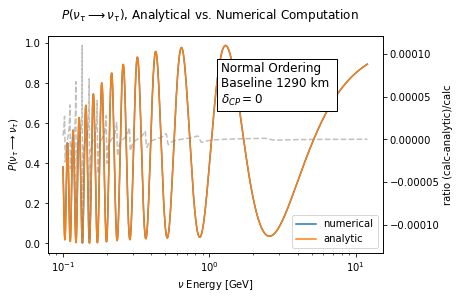

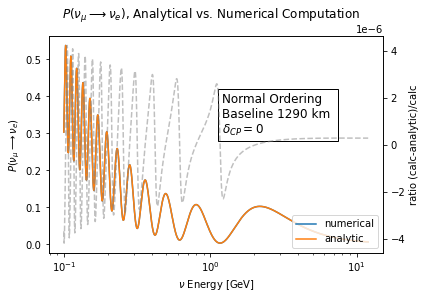

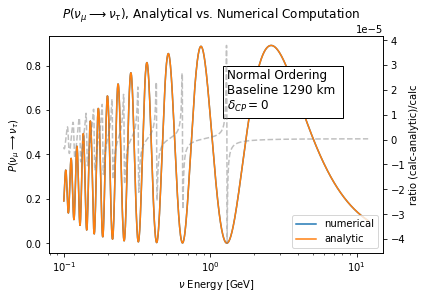

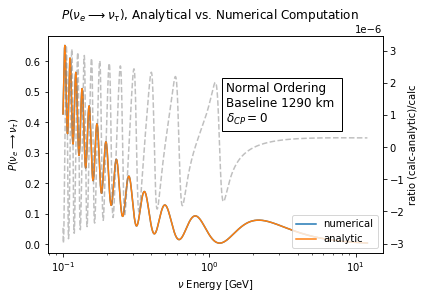

In [6]:
#Fix a baseline, and vary energy and d_cp parameters, compare between calculators. We will use DUNE baseline and ~energies for this
baseline = 1290*km
energies = np.logspace(np.log10(0.1*GeV), np.log10(12*GeV), 1000)
nu = NuNO_nufit_4()
nu.d_cp = -np.pi/2

ee_calc = []
mm_calc = []
tt_calc = []
em_calc = []
et_calc = []
mt_calc = []
tm_calc = []
te_calc = []
me_calc = []

ee = []
mm = []
tt = []
em = []
et = []
mt = []
tm = []
te = []
me = []

##define this calculator

calc = Neutrino_Oscillation_Calculator(nu, crust)


##define analytic calculator hamiltonian:
h_vacuum_energy_indep = \
        hamiltonians3nu.hamiltonian_3nu_vacuum_energy_independent(  sin(nu.theta_12),
                                                                    sin(nu.theta_23),
                                                                    sin(nu.theta_13),
                                                                    nu.d_cp,
                                                                    nu.dM2_21,
                                                                    nu.dM2_31)

for E in energies:
    # Units of VCC_EARTH_CRUST: [eV]
        h_matter = hamiltonians3nu.hamiltonian_3nu_matter(  h_vacuum_energy_indep,
                                                            E,
                                                            crust.coupling_strength()*nu.mode)
        Pee, Pem, Pet, Pme, Pmm, Pmt, Pte, Ptm, Ptt = \
            oscprob3nu.probabilities_3nu(h_matter, (baseline/km)*CONV_KM_TO_INV_EV)
        
        ee.append(Pee)
        mm.append(Pmm)
        tt.append(Ptt)
        et.append(Pet)
        em.append(Pem)
        mt.append(Pmt)
        te.append(Pte)
        me.append(Pme)
        tm.append(Ptm)
        
        TEV = calc.Time_Evolution___Flavor(E, baseline)
        ee_calc.append(np.absolute(TEV[0][0])**2)
        em_calc.append(np.absolute(TEV[1][0])**2)
        et_calc.append(np.absolute(TEV[2][0])**2)
        mm_calc.append(np.absolute(TEV[1][1])**2)
        tt_calc.append(np.absolute(TEV[2][2])**2)
        mt_calc.append(np.absolute(TEV[2][1])**2)
        me_calc.append(np.absolute(TEV[0][1])**2)
        te_calc.append(np.absolute(TEV[0][2])**2)
        tm_calc.append(np.absolute(TEV[1][2])**2)
        

#do the plotting
fig = plt.figure()
fig.suptitle(r'$P(\nu_e \longrightarrow \nu_e)$, Analytical vs. Numerical Computation')
ax = fig.add_subplot()
ax.plot(energies/GeV, ee_calc, label='numerical')
ax.plot(energies/GeV, ee, label='analytic')
ax.set_xscale('log')
ax.set_xlabel(r'$\nu$ Energy [GeV]')
ax.set_ylabel(r'$P(\nu_e \longrightarrow \nu_e)$')
plt.legend(loc=4)
ax.text(1.2,0.5, 'Normal Ordering \nBaseline 1290 km \n$\delta_{CP}=0$', bbox={'facecolor' : 'white' }, fontsize=12 )
ax1 = ax.twinx()
ax1.plot(energies/GeV, np.divide(np.array(ee_calc)-np.array(ee),ee_calc), linestyle='--', color='gray', alpha=0.5)
ax1.set_ylabel('ratio (calc-analytic)/calc')
fig.savefig(prefix+'ee_no.png')



#####################################################
fig = plt.figure()
fig.suptitle(r'$P(\nu_{\mu} \longrightarrow \nu_{\mu})$, Analytical vs. Numerical Computation')
ax = fig.add_subplot()
ax.plot(energies/GeV, mm_calc, label='numerical')
ax.plot(energies/GeV, mm, label='analytic')
ax.set_xscale('log')
ax.set_xlabel(r'$\nu$ Energy [GeV]')
ax.set_ylabel(r'$P(\nu_{\mu} \longrightarrow \nu_{\mu})$')
plt.legend(loc=4)
ax.text(1.2,0.7, 'Normal Ordering \nBaseline 1290 km \n$\delta_{CP}=0$', bbox={'facecolor' : 'white' }, fontsize=12 )
ax1 = ax.twinx()
ax1.plot(energies/GeV, np.divide(np.array(mm_calc)-np.array(mm),mm_calc), linestyle='--', color='gray', alpha=0.5)
ax1.set_ylabel('ratio (calc-analytic)/calc')
fig.savefig(prefix+'mm_no.png')


#####################################################
fig = plt.figure()
fig.suptitle(r'$P(\nu_{\tau} \longrightarrow \nu_{\tau})$, Analytical vs. Numerical Computation')
ax = fig.add_subplot()
ax.plot(energies/GeV, tt_calc, label='numerical')
ax.plot(energies/GeV, tt, label='analytic')
ax.set_xscale('log')
ax.set_xlabel(r'$\nu$ Energy [GeV]')
ax.set_ylabel(r'$P(\nu_{\tau} \longrightarrow \nu_{\tau})$')
plt.legend(loc=4)
ax.text(1.2,0.7, 'Normal Ordering \nBaseline 1290 km \n$\delta_{CP}=0$', bbox={'facecolor' : 'white' }, fontsize=12 )
ax1 = ax.twinx()
ax1.plot(energies/GeV, np.divide(np.array(tt_calc)-np.array(tt),tt_calc), linestyle='--', color='gray', alpha=0.5)
ax1.set_ylabel('ratio (calc-analytic)/calc')
fig.savefig(prefix+'tt_no.png')


#####################################################
fig = plt.figure()
fig.suptitle(r'$P(\nu_{\mu} \longrightarrow \nu_{e})$, Analytical vs. Numerical Computation')
ax = fig.add_subplot()
ax.plot(energies/GeV, me_calc, label='numerical')
ax.plot(energies/GeV, me, label='analytic')
ax.set_xscale('log')
ax.set_xlabel(r'$\nu$ Energy [GeV]')
ax.set_ylabel(r'$P(\nu_{\mu} \longrightarrow \nu_{e})$')
plt.legend(loc=4)
ax.text(1.2,0.3, 'Normal Ordering \nBaseline 1290 km \n$\delta_{CP}=0$', bbox={'facecolor' : 'white' }, fontsize=12 )
ax1 = ax.twinx()
ax1.plot(energies/GeV, np.divide(np.array(me_calc)-np.array(me),me_calc), linestyle='--', color='gray', alpha=0.5)
ax1.set_ylabel('ratio (calc-analytic)/calc')
fig.savefig(prefix+'me_no.png')

#####################################################
fig = plt.figure()
fig.suptitle(r'$P(\nu_{\mu} \longrightarrow \nu_{\tau})$, Analytical vs. Numerical Computation')
ax = fig.add_subplot()
ax.plot(energies/GeV, mt_calc, label='numerical')
ax.plot(energies/GeV, mt, label='analytic')
ax.set_xscale('log')
ax.set_xlabel(r'$\nu$ Energy [GeV]')
ax.set_ylabel(r'$P(\nu_{\mu} \longrightarrow \nu_{\tau})$')
plt.legend(loc=4)
ax.text(1.3,0.6, 'Normal Ordering \nBaseline 1290 km \n$\delta_{CP}=0$', bbox={'facecolor' : 'white' }, fontsize=12 )
ax1 = ax.twinx()
ax1.plot(energies/GeV, np.divide(np.array(mt_calc)-np.array(mt),mt_calc), linestyle='--', color='gray', alpha=0.5)
ax1.set_ylabel('ratio (calc-analytic)/calc')
fig.savefig(prefix+'mt_no.png')


#####################################################
fig = plt.figure()
fig.suptitle(r'$P(\nu_{e} \longrightarrow \nu_{\tau})$, Analytical vs. Numerical Computation')
ax = fig.add_subplot()
ax.plot(energies/GeV, et_calc, label='numerical')
ax.plot(energies/GeV, et, label='analytic')
ax.set_xscale('log')
ax.set_xlabel(r'$\nu$ Energy [GeV]')
ax.set_ylabel(r'$P(\nu_{e} \longrightarrow \nu_{\tau})$')
plt.legend(loc=4)
ax.text(1.3,0.4, 'Normal Ordering \nBaseline 1290 km \n$\delta_{CP}=0$', bbox={'facecolor' : 'white' }, fontsize=12 )
ax1 = ax.twinx()
ax1.plot(energies/GeV, np.divide(np.array(et_calc)-np.array(et),et_calc), linestyle='--', color='gray', alpha=0.5)
ax1.set_ylabel('ratio (calc-analytic)/calc')
fig.savefig(prefix+'et_no.png')

plt.show()
        



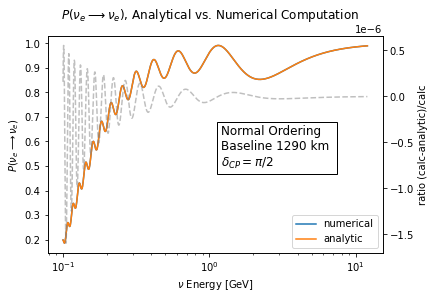

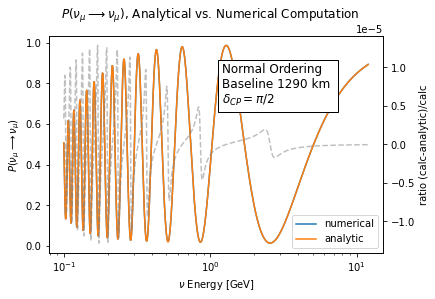

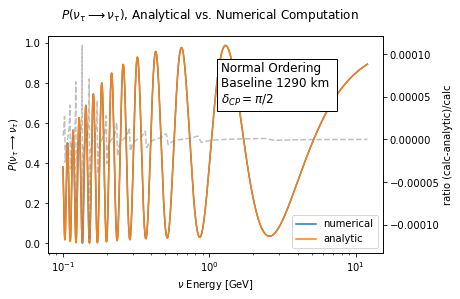

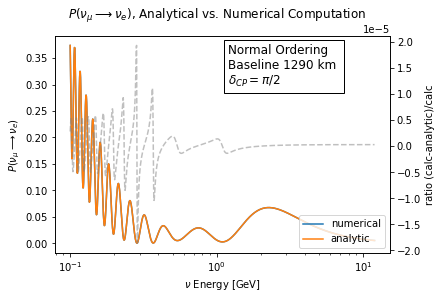

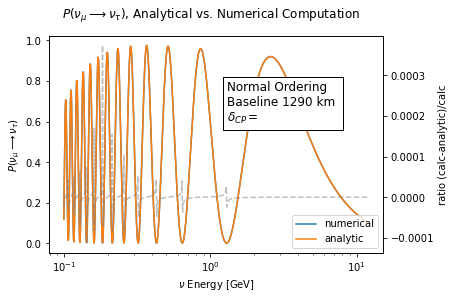

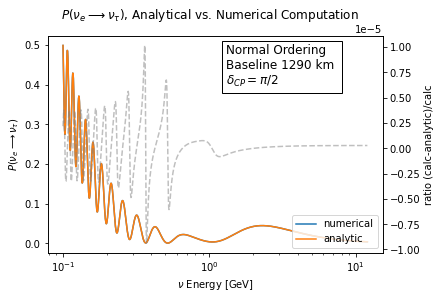

In [10]:
#Fix a baseline, and vary energy and d_cp parameters, compare between calculators. We will use DUNE baseline and ~energies for this
#
#d_cp = 1.57 here
#
#
baseline = 1290*km
energies = np.logspace(np.log10(0.1*GeV), np.log10(12*GeV), 1000)
nu = NuNO_nufit_4()
nu.d_cp = 1.57

ee_calc = []
mm_calc = []
tt_calc = []
em_calc = []
et_calc = []
mt_calc = []
tm_calc = []
te_calc = []
me_calc = []

ee = []
mm = []
tt = []
em = []
et = []
mt = []
tm = []
te = []
me = []

##define this calculator

calc = Neutrino_Oscillation_Calculator(nu, crust)


##define analytic calculator hamiltonian:
h_vacuum_energy_indep = \
        hamiltonians3nu.hamiltonian_3nu_vacuum_energy_independent(  sin(nu.theta_12),
                                                                    sin(nu.theta_23),
                                                                    sin(nu.theta_13),
                                                                    nu.d_cp,
                                                                    nu.dM2_21,
                                                                    nu.dM2_31)

for E in energies:
    # Units of VCC_EARTH_CRUST: [eV]
        h_matter = hamiltonians3nu.hamiltonian_3nu_matter(  h_vacuum_energy_indep,
                                                            E,
                                                            crust.coupling_strength()*nu.mode)
        Pee, Pem, Pet, Pme, Pmm, Pmt, Pte, Ptm, Ptt = \
            oscprob3nu.probabilities_3nu(h_matter, (baseline/km)*CONV_KM_TO_INV_EV)
        
        ee.append(Pee)
        mm.append(Pmm)
        tt.append(Ptt)
        et.append(Pet)
        em.append(Pem)
        mt.append(Pmt)
        te.append(Pte)
        me.append(Pme)
        tm.append(Ptm)
        
        TEV = calc.Time_Evolution___Flavor(E, baseline)
        ee_calc.append(np.absolute(TEV[0][0])**2)
        em_calc.append(np.absolute(TEV[1][0])**2)
        et_calc.append(np.absolute(TEV[2][0])**2)
        mm_calc.append(np.absolute(TEV[1][1])**2)
        tt_calc.append(np.absolute(TEV[2][2])**2)
        mt_calc.append(np.absolute(TEV[2][1])**2)
        me_calc.append(np.absolute(TEV[0][1])**2)
        te_calc.append(np.absolute(TEV[0][2])**2)
        tm_calc.append(np.absolute(TEV[1][2])**2)
        

#do the plotting
fig = plt.figure()
fig.suptitle(r'$P(\nu_e \longrightarrow \nu_e)$, Analytical vs. Numerical Computation')
ax = fig.add_subplot()
ax.plot(energies/GeV, ee_calc, label='numerical')
ax.plot(energies/GeV, ee, label='analytic')
ax.set_xscale('log')
ax.set_xlabel(r'$\nu$ Energy [GeV]')
ax.set_ylabel(r'$P(\nu_e \longrightarrow \nu_e)$')
plt.legend(loc=4)
ax.text(1.2,0.5, 'Normal Ordering \nBaseline 1290 km \n$\delta_{CP}=\pi/2$', bbox={'facecolor' : 'white' }, fontsize=12 )
ax1 = ax.twinx()
ax1.plot(energies/GeV, np.divide(np.array(ee_calc)-np.array(ee),ee_calc), linestyle='--', color='gray', alpha=0.5)
ax1.set_ylabel('ratio (calc-analytic)/calc')
fig.savefig(prefix+'ee_no_cpv.png')


#####################################################
fig = plt.figure()
fig.suptitle(r'$P(\nu_{\mu} \longrightarrow \nu_{\mu})$, Analytical vs. Numerical Computation')
ax = fig.add_subplot()
ax.plot(energies/GeV, mm_calc, label='numerical')
ax.plot(energies/GeV, mm, label='analytic')
ax.set_xscale('log')
ax.set_xlabel(r'$\nu$ Energy [GeV]')
ax.set_ylabel(r'$P(\nu_{\mu} \longrightarrow \nu_{\mu})$')
plt.legend(loc=4)
ax.text(1.2,0.7, 'Normal Ordering \nBaseline 1290 km \n$\delta_{CP}=\pi/2$', bbox={'facecolor' : 'white' }, fontsize=12 )
ax1 = ax.twinx()
ax1.plot(energies/GeV, np.divide(np.array(mm_calc)-np.array(mm),mm_calc), linestyle='--', color='gray', alpha=0.5)
ax1.set_ylabel('ratio (calc-analytic)/calc')
fig.savefig(prefix+'mm_no_cpv.png')


#####################################################
fig = plt.figure()
fig.suptitle(r'$P(\nu_{\tau} \longrightarrow \nu_{\tau})$, Analytical vs. Numerical Computation')
ax = fig.add_subplot()
ax.plot(energies/GeV, tt_calc, label='numerical')
ax.plot(energies/GeV, tt, label='analytic')
ax.set_xscale('log')
ax.set_xlabel(r'$\nu$ Energy [GeV]')
ax.set_ylabel(r'$P(\nu_{\tau} \longrightarrow \nu_{\tau})$')
plt.legend(loc=4)
ax.text(1.2,0.7, 'Normal Ordering \nBaseline 1290 km \n$\delta_{CP}=\pi/2$', bbox={'facecolor' : 'white' }, fontsize=12 )
ax1 = ax.twinx()
ax1.plot(energies/GeV, np.divide(np.array(tt_calc)-np.array(tt),tt_calc), linestyle='--', color='gray', alpha=0.5)
ax1.set_ylabel('ratio (calc-analytic)/calc')
fig.savefig(prefix+'tt_no_cpv.png')


#####################################################
fig = plt.figure()
fig.suptitle(r'$P(\nu_{\mu} \longrightarrow \nu_{e})$, Analytical vs. Numerical Computation')
ax = fig.add_subplot()
ax.plot(energies/GeV, me_calc, label='numerical')
ax.plot(energies/GeV, me, label='analytic')
ax.set_xscale('log')
ax.set_xlabel(r'$\nu$ Energy [GeV]')
ax.set_ylabel(r'$P(\nu_{\mu} \longrightarrow \nu_{e})$')
plt.legend(loc=4)
ax.text(1.2,0.3, 'Normal Ordering \nBaseline 1290 km \n$\delta_{CP}=\pi/2$', bbox={'facecolor' : 'white' }, fontsize=12 )
ax1 = ax.twinx()
ax1.plot(energies/GeV, np.divide(np.array(me_calc)-np.array(me),me_calc), linestyle='--', color='gray', alpha=0.5)
ax1.set_ylabel('ratio (calc-analytic)/calc')
fig.savefig(prefix+'me_no_cpv.png')

#####################################################
fig = plt.figure()
fig.suptitle(r'$P(\nu_{\mu} \longrightarrow \nu_{\tau})$, Analytical vs. Numerical Computation')
ax = fig.add_subplot()
ax.plot(energies/GeV, mt_calc, label='numerical')
ax.plot(energies/GeV, mt, label='analytic')
ax.set_xscale('log')
ax.set_xlabel(r'$\nu$ Energy [GeV]')
ax.set_ylabel(r'$P(\nu_{\mu} \longrightarrow \nu_{\tau})$')
plt.legend(loc=4)
ax.text(1.3,0.6, 'Normal Ordering \nBaseline 1290 km \n$\delta_{CP}=$', bbox={'facecolor' : 'white' }, fontsize=12 )
ax1 = ax.twinx()
ax1.plot(energies/GeV, np.divide(np.array(mt_calc)-np.array(mt),mt_calc), linestyle='--', color='gray', alpha=0.5)
ax1.set_ylabel('ratio (calc-analytic)/calc')


#####################################################
fig = plt.figure()
fig.suptitle(r'$P(\nu_{e} \longrightarrow \nu_{\tau})$, Analytical vs. Numerical Computation')
ax = fig.add_subplot()
ax.plot(energies/GeV, et_calc, label='numerical')
ax.plot(energies/GeV, et, label='analytic')
ax.set_xscale('log')
ax.set_xlabel(r'$\nu$ Energy [GeV]')
ax.set_ylabel(r'$P(\nu_{e} \longrightarrow \nu_{\tau})$')
plt.legend(loc=4)
ax.text(1.3,0.4, 'Normal Ordering \nBaseline 1290 km \n$\delta_{CP}=\pi/2$', bbox={'facecolor' : 'white' }, fontsize=12 )
ax1 = ax.twinx()
ax1.plot(energies/GeV, np.divide(np.array(et_calc)-np.array(et),et_calc), linestyle='--', color='gray', alpha=0.5)
ax1.set_ylabel('ratio (calc-analytic)/calc')

plt.show()
        



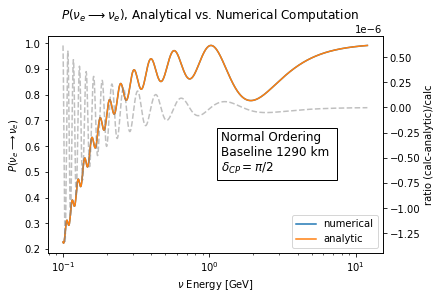

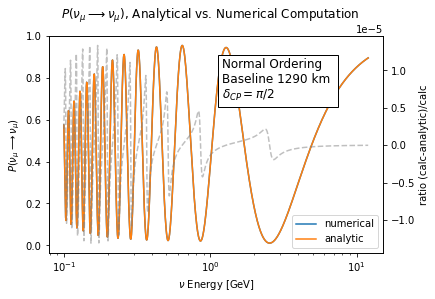

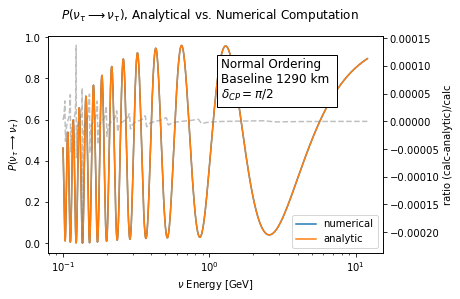

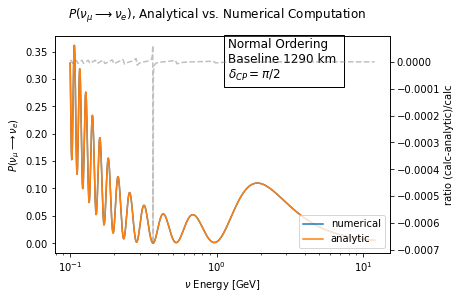

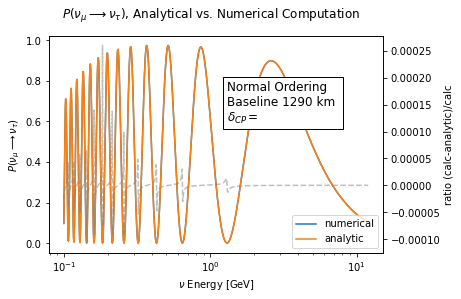

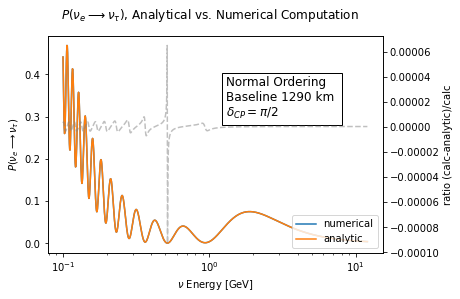

In [57]:
#Fix a baseline, and vary energy and d_cp parameters, compare between calculators. We will use DUNE baseline and ~energies for this

## DOUBLE the matter density here
crust.N_e = crust.N_e*2.0

baseline = 1290*km
energies = np.logspace(np.log10(0.1*GeV), np.log10(12*GeV), 1000)
nu = NuNO_nufit_4()
nu.d_cp = 1.57

ee_calc = []
mm_calc = []
tt_calc = []
em_calc = []
et_calc = []
mt_calc = []
tm_calc = []
te_calc = []
me_calc = []

ee = []
mm = []
tt = []
em = []
et = []
mt = []
tm = []
te = []
me = []

##define this calculator

calc = Neutrino_Oscillation_Calculator(nu, crust)


##define analytic calculator hamiltonian:
h_vacuum_energy_indep = \
        hamiltonians3nu.hamiltonian_3nu_vacuum_energy_independent(  sin(nu.theta_12),
                                                                    sin(nu.theta_23),
                                                                    sin(nu.theta_13),
                                                                    nu.d_cp,
                                                                    nu.dM2_21,
                                                                    nu.dM2_31)

for E in energies:
    # Units of VCC_EARTH_CRUST: [eV]
        h_matter = hamiltonians3nu.hamiltonian_3nu_matter(  h_vacuum_energy_indep,
                                                            E,
                                                            crust.coupling_strength()*nu.mode)
        Pee, Pem, Pet, Pme, Pmm, Pmt, Pte, Ptm, Ptt = \
            oscprob3nu.probabilities_3nu(h_matter, (baseline/km)*CONV_KM_TO_INV_EV)
        
        ee.append(Pee)
        mm.append(Pmm)
        tt.append(Ptt)
        et.append(Pet)
        em.append(Pem)
        mt.append(Pmt)
        te.append(Pte)
        me.append(Pme)
        tm.append(Ptm)
        
        TEV = calc.Time_Evolution___Flavor(E, baseline)
        ee_calc.append(np.absolute(TEV[0][0])**2)
        em_calc.append(np.absolute(TEV[1][0])**2)
        et_calc.append(np.absolute(TEV[2][0])**2)
        mm_calc.append(np.absolute(TEV[1][1])**2)
        tt_calc.append(np.absolute(TEV[2][2])**2)
        mt_calc.append(np.absolute(TEV[2][1])**2)
        me_calc.append(np.absolute(TEV[0][1])**2)
        te_calc.append(np.absolute(TEV[0][2])**2)
        tm_calc.append(np.absolute(TEV[1][2])**2)
        

#do the plotting
fig = plt.figure()
fig.suptitle(r'$P(\nu_e \longrightarrow \nu_e)$, Analytical vs. Numerical Computation')
ax = fig.add_subplot()
ax.plot(energies/GeV, ee_calc, label='numerical')
ax.plot(energies/GeV, ee, label='analytic')
ax.set_xscale('log')
ax.set_xlabel(r'$\nu$ Energy [GeV]')
ax.set_ylabel(r'$P(\nu_e \longrightarrow \nu_e)$')
plt.legend(loc=4)
ax.text(1.2,0.5, 'Normal Ordering \nBaseline 1290 km \n$\delta_{CP}=\pi/2$', bbox={'facecolor' : 'white' }, fontsize=12 )
ax1 = ax.twinx()
ax1.plot(energies/GeV, np.divide(np.array(ee_calc)-np.array(ee),ee_calc), linestyle='--', color='gray', alpha=0.5)
ax1.set_ylabel('ratio (calc-analytic)/calc')



#####################################################
fig = plt.figure()
fig.suptitle(r'$P(\nu_{\mu} \longrightarrow \nu_{\mu})$, Analytical vs. Numerical Computation')
ax = fig.add_subplot()
ax.plot(energies/GeV, mm_calc, label='numerical')
ax.plot(energies/GeV, mm, label='analytic')
ax.set_xscale('log')
ax.set_xlabel(r'$\nu$ Energy [GeV]')
ax.set_ylabel(r'$P(\nu_{\mu} \longrightarrow \nu_{\mu})$')
plt.legend(loc=4)
ax.text(1.2,0.7, 'Normal Ordering \nBaseline 1290 km \n$\delta_{CP}=\pi/2$', bbox={'facecolor' : 'white' }, fontsize=12 )
ax1 = ax.twinx()
ax1.plot(energies/GeV, np.divide(np.array(mm_calc)-np.array(mm),mm_calc), linestyle='--', color='gray', alpha=0.5)
ax1.set_ylabel('ratio (calc-analytic)/calc')


#####################################################
fig = plt.figure()
fig.suptitle(r'$P(\nu_{\tau} \longrightarrow \nu_{\tau})$, Analytical vs. Numerical Computation')
ax = fig.add_subplot()
ax.plot(energies/GeV, tt_calc, label='numerical')
ax.plot(energies/GeV, tt, label='analytic')
ax.set_xscale('log')
ax.set_xlabel(r'$\nu$ Energy [GeV]')
ax.set_ylabel(r'$P(\nu_{\tau} \longrightarrow \nu_{\tau})$')
plt.legend(loc=4)
ax.text(1.2,0.7, 'Normal Ordering \nBaseline 1290 km \n$\delta_{CP}=\pi/2$', bbox={'facecolor' : 'white' }, fontsize=12 )
ax1 = ax.twinx()
ax1.plot(energies/GeV, np.divide(np.array(tt_calc)-np.array(tt),tt_calc), linestyle='--', color='gray', alpha=0.5)
ax1.set_ylabel('ratio (calc-analytic)/calc')


#####################################################
fig = plt.figure()
fig.suptitle(r'$P(\nu_{\mu} \longrightarrow \nu_{e})$, Analytical vs. Numerical Computation')
ax = fig.add_subplot()
ax.plot(energies/GeV, me_calc, label='numerical')
ax.plot(energies/GeV, me, label='analytic')
ax.set_xscale('log')
ax.set_xlabel(r'$\nu$ Energy [GeV]')
ax.set_ylabel(r'$P(\nu_{\mu} \longrightarrow \nu_{e})$')
plt.legend(loc=4)
ax.text(1.2,0.3, 'Normal Ordering \nBaseline 1290 km \n$\delta_{CP}=\pi/2$', bbox={'facecolor' : 'white' }, fontsize=12 )
ax1 = ax.twinx()
ax1.plot(energies/GeV, np.divide(np.array(me_calc)-np.array(me),me_calc), linestyle='--', color='gray', alpha=0.5)
ax1.set_ylabel('ratio (calc-analytic)/calc')

#####################################################
fig = plt.figure()
fig.suptitle(r'$P(\nu_{\mu} \longrightarrow \nu_{\tau})$, Analytical vs. Numerical Computation')
ax = fig.add_subplot()
ax.plot(energies/GeV, mt_calc, label='numerical')
ax.plot(energies/GeV, mt, label='analytic')
ax.set_xscale('log')
ax.set_xlabel(r'$\nu$ Energy [GeV]')
ax.set_ylabel(r'$P(\nu_{\mu} \longrightarrow \nu_{\tau})$')
plt.legend(loc=4)
ax.text(1.3,0.6, 'Normal Ordering \nBaseline 1290 km \n$\delta_{CP}=$', bbox={'facecolor' : 'white' }, fontsize=12 )
ax1 = ax.twinx()
ax1.plot(energies/GeV, np.divide(np.array(mt_calc)-np.array(mt),mt_calc), linestyle='--', color='gray', alpha=0.5)
ax1.set_ylabel('ratio (calc-analytic)/calc')


#####################################################
fig = plt.figure()
fig.suptitle(r'$P(\nu_{e} \longrightarrow \nu_{\tau})$, Analytical vs. Numerical Computation')
ax = fig.add_subplot()
ax.plot(energies/GeV, et_calc, label='numerical')
ax.plot(energies/GeV, et, label='analytic')
ax.set_xscale('log')
ax.set_xlabel(r'$\nu$ Energy [GeV]')
ax.set_ylabel(r'$P(\nu_{e} \longrightarrow \nu_{\tau})$')
plt.legend(loc=4)
ax.text(1.3,0.3, 'Normal Ordering \nBaseline 1290 km \n$\delta_{CP}=\pi/2$', bbox={'facecolor' : 'white' }, fontsize=12 )
ax1 = ax.twinx()
ax1.plot(energies/GeV, np.divide(np.array(et_calc)-np.array(et),et_calc), linestyle='--', color='gray', alpha=0.5)
ax1.set_ylabel('ratio (calc-analytic)/calc')


crust.N_e = crust.N_e/2.
plt.show()
        



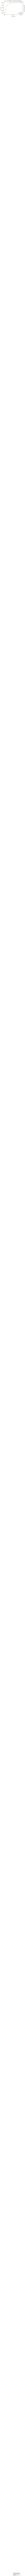

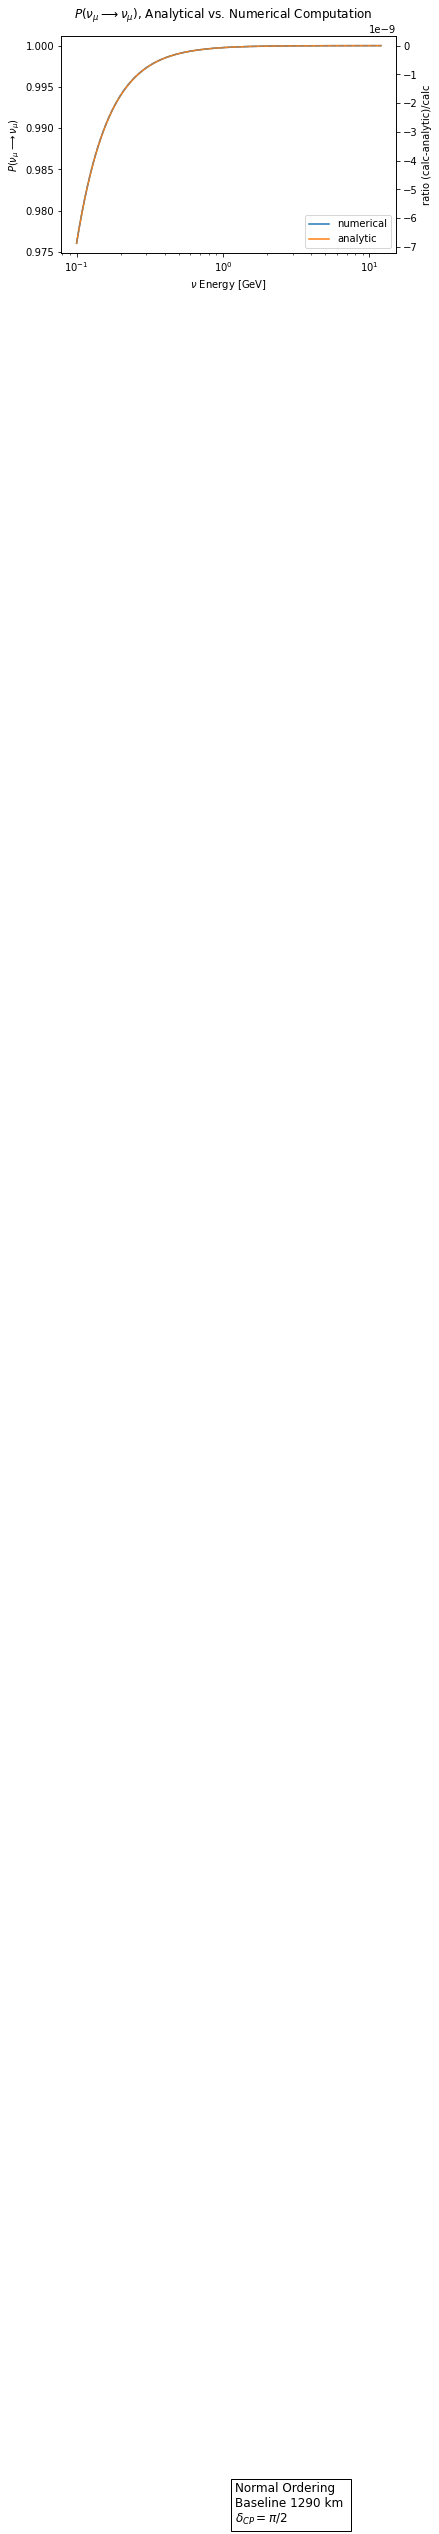

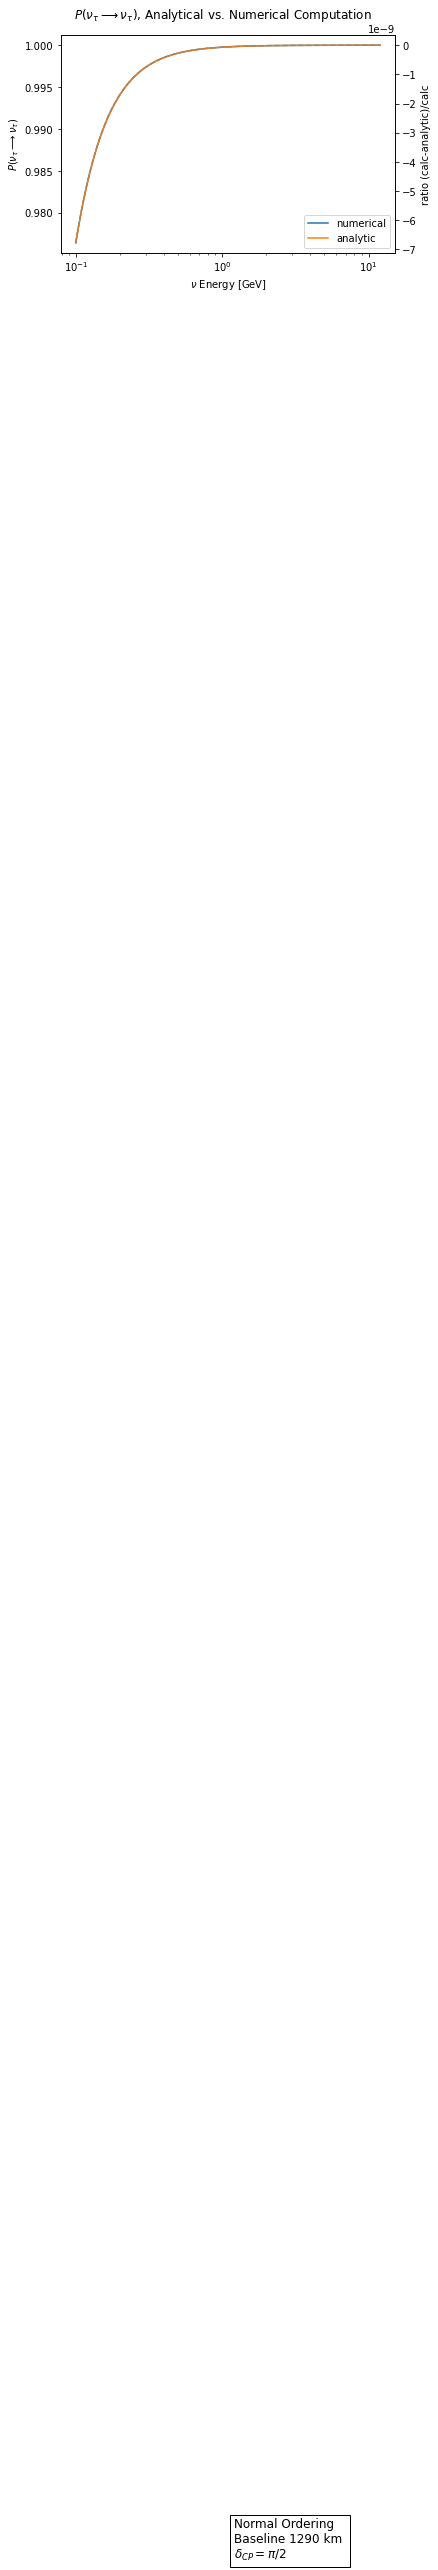

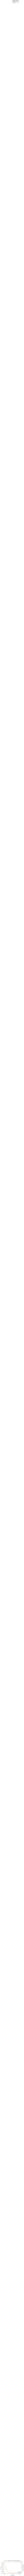

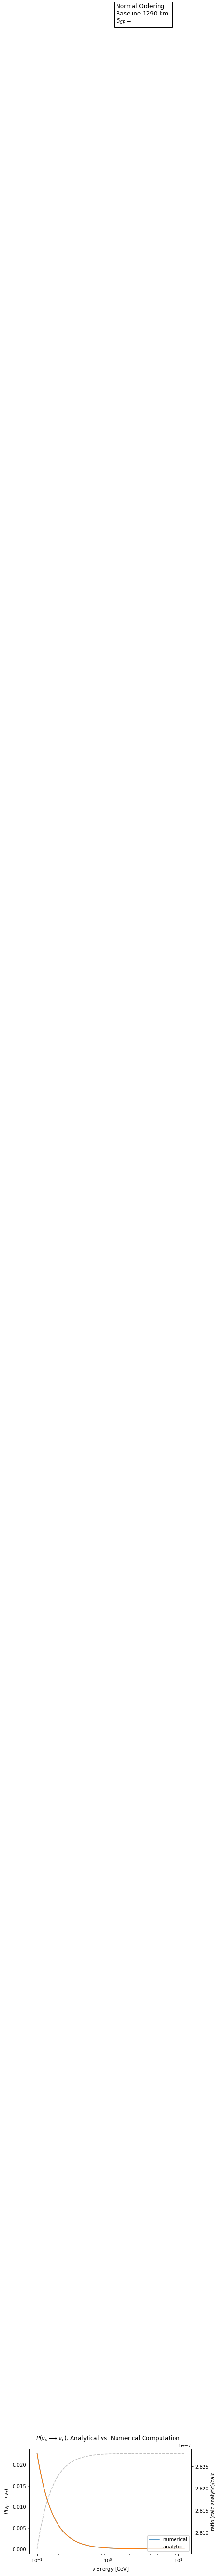

ValueError: Image size of 452x66413 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 2 Axes>

In [173]:
#Fix a baseline, and vary energy and d_cp parameters, compare between calculators. We will use DUNE baseline and ~energies for this

## 10x the matter density here
crust.N_e = crust.N_e*10.0

baseline = 1290*km
energies = np.logspace(np.log10(0.1*GeV), np.log10(12*GeV), 1000)
nu = NuNO_nufit_4()
nu.d_cp = 1.57

ee_calc = []
mm_calc = []
tt_calc = []
em_calc = []
et_calc = []
mt_calc = []
tm_calc = []
te_calc = []
me_calc = []

ee = []
mm = []
tt = []
em = []
et = []
mt = []
tm = []
te = []
me = []

##define this calculator

calc = Neutrino_Oscillation_Calculator(nu, crust)


##define analytic calculator hamiltonian:
h_vacuum_energy_indep = \
        hamiltonians3nu.hamiltonian_3nu_vacuum_energy_independent(  sin(nu.theta_12),
                                                                    sin(nu.theta_23),
                                                                    sin(nu.theta_13),
                                                                    nu.d_cp,
                                                                    nu.dM2_21,
                                                                    nu.dM2_31)

for E in energies:
    # Units of VCC_EARTH_CRUST: [eV]
        h_matter = hamiltonians3nu.hamiltonian_3nu_matter(  h_vacuum_energy_indep,
                                                            E,
                                                            crust.coupling_strength()*nu.mode)
        Pee, Pem, Pet, Pme, Pmm, Pmt, Pte, Ptm, Ptt = \
            oscprob3nu.probabilities_3nu(h_matter, (baseline/km)*CONV_KM_TO_INV_EV)
        
        ee.append(Pee)
        mm.append(Pmm)
        tt.append(Ptt)
        et.append(Pet)
        em.append(Pem)
        mt.append(Pmt)
        te.append(Pte)
        me.append(Pme)
        tm.append(Ptm)
        
        TEV = calc.Time_Evolution___Flavor(E, baseline)
        ee_calc.append(np.absolute(TEV[0][0])**2)
        em_calc.append(np.absolute(TEV[1][0])**2)
        et_calc.append(np.absolute(TEV[2][0])**2)
        mm_calc.append(np.absolute(TEV[1][1])**2)
        tt_calc.append(np.absolute(TEV[2][2])**2)
        mt_calc.append(np.absolute(TEV[2][1])**2)
        me_calc.append(np.absolute(TEV[0][1])**2)
        te_calc.append(np.absolute(TEV[0][2])**2)
        tm_calc.append(np.absolute(TEV[1][2])**2)
        

#do the plotting
fig = plt.figure()
fig.suptitle(r'$P(\nu_e \longrightarrow \nu_e)$, Analytical vs. Numerical Computation')
ax = fig.add_subplot()
ax.plot(energies/GeV, ee_calc, label='numerical')
ax.plot(energies/GeV, ee, label='analytic')
ax.set_xscale('log')
ax.set_xlabel(r'$\nu$ Energy [GeV]')
ax.set_ylabel(r'$P(\nu_e \longrightarrow \nu_e)$')
plt.legend(loc=4)
ax.text(1.2,0.5, 'Normal Ordering \nBaseline 1290 km \n$\delta_{CP}=\pi/2$', bbox={'facecolor' : 'white' }, fontsize=12 )
ax1 = ax.twinx()
ax1.plot(energies/GeV, np.divide(np.array(ee_calc)-np.array(ee),ee_calc), linestyle='--', color='gray', alpha=0.5)
ax1.set_ylabel('ratio (calc-analytic)/calc')



#####################################################
fig = plt.figure()
fig.suptitle(r'$P(\nu_{\mu} \longrightarrow \nu_{\mu})$, Analytical vs. Numerical Computation')
ax = fig.add_subplot()
ax.plot(energies/GeV, mm_calc, label='numerical')
ax.plot(energies/GeV, mm, label='analytic')
ax.set_xscale('log')
ax.set_xlabel(r'$\nu$ Energy [GeV]')
ax.set_ylabel(r'$P(\nu_{\mu} \longrightarrow \nu_{\mu})$')
plt.legend(loc=4)
ax.text(1.2,0.7, 'Normal Ordering \nBaseline 1290 km \n$\delta_{CP}=\pi/2$', bbox={'facecolor' : 'white' }, fontsize=12 )
ax1 = ax.twinx()
ax1.plot(energies/GeV, np.divide(np.array(mm_calc)-np.array(mm),mm_calc), linestyle='--', color='gray', alpha=0.5)
ax1.set_ylabel('ratio (calc-analytic)/calc')


#####################################################
fig = plt.figure()
fig.suptitle(r'$P(\nu_{\tau} \longrightarrow \nu_{\tau})$, Analytical vs. Numerical Computation')
ax = fig.add_subplot()
ax.plot(energies/GeV, tt_calc, label='numerical')
ax.plot(energies/GeV, tt, label='analytic')
ax.set_xscale('log')
ax.set_xlabel(r'$\nu$ Energy [GeV]')
ax.set_ylabel(r'$P(\nu_{\tau} \longrightarrow \nu_{\tau})$')
plt.legend(loc=4)
ax.text(1.2,0.7, 'Normal Ordering \nBaseline 1290 km \n$\delta_{CP}=\pi/2$', bbox={'facecolor' : 'white' }, fontsize=12 )
ax1 = ax.twinx()
ax1.plot(energies/GeV, np.divide(np.array(tt_calc)-np.array(tt),tt_calc), linestyle='--', color='gray', alpha=0.5)
ax1.set_ylabel('ratio (calc-analytic)/calc')


#####################################################
fig = plt.figure()
fig.suptitle(r'$P(\nu_{\mu} \longrightarrow \nu_{e})$, Analytical vs. Numerical Computation')
ax = fig.add_subplot()
ax.plot(energies/GeV, me_calc, label='numerical')
ax.plot(energies/GeV, me, label='analytic')
ax.set_xscale('log')
ax.set_xlabel(r'$\nu$ Energy [GeV]')
ax.set_ylabel(r'$P(\nu_{\mu} \longrightarrow \nu_{e})$')
plt.legend(loc=4)
ax.text(1.2,0.3, 'Normal Ordering \nBaseline 1290 km \n$\delta_{CP}=\pi/2$', bbox={'facecolor' : 'white' }, fontsize=12 )
ax1 = ax.twinx()
ax1.plot(energies/GeV, np.divide(np.array(me_calc)-np.array(me),me_calc), linestyle='--', color='gray', alpha=0.5)
ax1.set_ylabel('ratio (calc-analytic)/calc')

#####################################################
fig = plt.figure()
fig.suptitle(r'$P(\nu_{\mu} \longrightarrow \nu_{\tau})$, Analytical vs. Numerical Computation')
ax = fig.add_subplot()
ax.plot(energies/GeV, mt_calc, label='numerical')
ax.plot(energies/GeV, mt, label='analytic')
ax.set_xscale('log')
ax.set_xlabel(r'$\nu$ Energy [GeV]')
ax.set_ylabel(r'$P(\nu_{\mu} \longrightarrow \nu_{\tau})$')
plt.legend(loc=4)
ax.text(1.3,0.6, 'Normal Ordering \nBaseline 1290 km \n$\delta_{CP}=$', bbox={'facecolor' : 'white' }, fontsize=12 )
ax1 = ax.twinx()
ax1.plot(energies/GeV, np.divide(np.array(mt_calc)-np.array(mt),mt_calc), linestyle='--', color='gray', alpha=0.5)
ax1.set_ylabel('ratio (calc-analytic)/calc')


#####################################################
fig = plt.figure()
fig.suptitle(r'$P(\nu_{e} \longrightarrow \nu_{\tau})$, Analytical vs. Numerical Computation')
ax = fig.add_subplot()
ax.plot(energies/GeV, et_calc, label='numerical')
ax.plot(energies/GeV, et, label='analytic')
ax.set_xscale('log')
ax.set_xlabel(r'$\nu$ Energy [GeV]')
ax.set_ylabel(r'$P(\nu_{e} \longrightarrow \nu_{\tau})$')
plt.legend(loc=4)
ax.text(1.3,0.3, 'Normal Ordering \nBaseline 1290 km \n$\delta_{CP}=\pi/2$', bbox={'facecolor' : 'white' }, fontsize=12 )
ax1 = ax.twinx()
ax1.plot(energies/GeV, np.divide(np.array(et_calc)-np.array(et),et_calc), linestyle='--', color='gray', alpha=0.5)
ax1.set_ylabel('ratio (calc-analytic)/calc')


crust.N_e = crust.N_e/10.
plt.show()
        



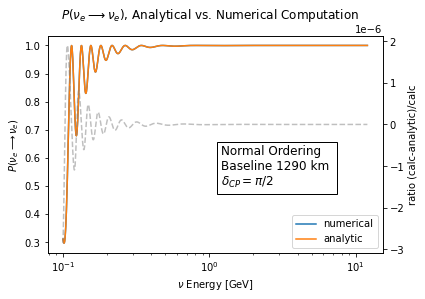

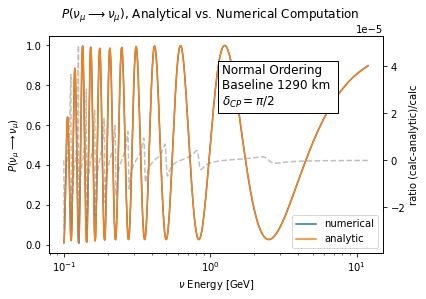

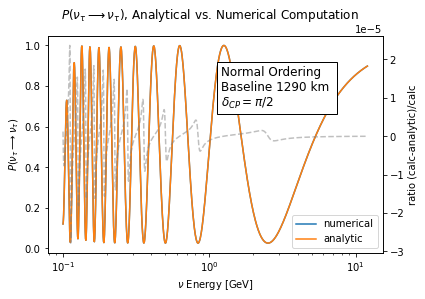

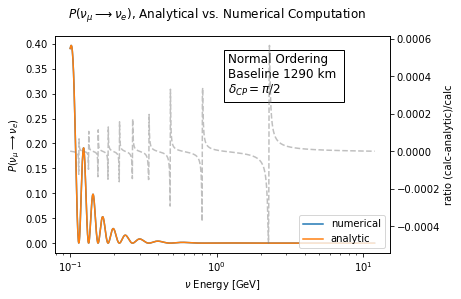

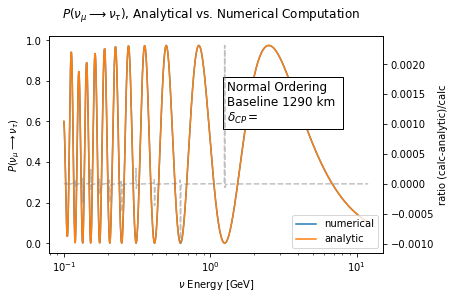

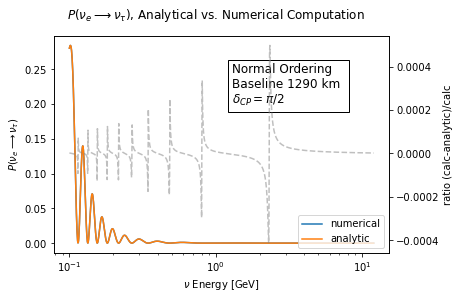

In [60]:
#Fix a baseline, and vary energy and d_cp parameters, compare between calculators. We will use DUNE baseline and ~energies for this

## 100x the matter density here
crust.N_e = crust.N_e*100.0

baseline = 1290*km
energies = np.logspace(np.log10(0.1*GeV), np.log10(12*GeV), 1000)
nu = NuNO_nufit_4()
nu.d_cp = 1.57

ee_calc = []
mm_calc = []
tt_calc = []
em_calc = []
et_calc = []
mt_calc = []
tm_calc = []
te_calc = []
me_calc = []

ee = []
mm = []
tt = []
em = []
et = []
mt = []
tm = []
te = []
me = []

##define this calculator

calc = Neutrino_Oscillation_Calculator(nu, crust)


##define analytic calculator hamiltonian:
h_vacuum_energy_indep = \
        hamiltonians3nu.hamiltonian_3nu_vacuum_energy_independent(  sin(nu.theta_12),
                                                                    sin(nu.theta_23),
                                                                    sin(nu.theta_13),
                                                                    nu.d_cp,
                                                                    nu.dM2_21,
                                                                    nu.dM2_31)

for E in energies:
    # Units of VCC_EARTH_CRUST: [eV]
        h_matter = hamiltonians3nu.hamiltonian_3nu_matter(  h_vacuum_energy_indep,
                                                            E,
                                                            crust.coupling_strength()*nu.mode)
        Pee, Pem, Pet, Pme, Pmm, Pmt, Pte, Ptm, Ptt = \
            oscprob3nu.probabilities_3nu(h_matter, (baseline/km)*CONV_KM_TO_INV_EV)
        
        ee.append(Pee)
        mm.append(Pmm)
        tt.append(Ptt)
        et.append(Pet)
        em.append(Pem)
        mt.append(Pmt)
        te.append(Pte)
        me.append(Pme)
        tm.append(Ptm)
        
        TEV = calc.Time_Evolution___Flavor(E, baseline)
        ee_calc.append(np.absolute(TEV[0][0])**2)
        em_calc.append(np.absolute(TEV[1][0])**2)
        et_calc.append(np.absolute(TEV[2][0])**2)
        mm_calc.append(np.absolute(TEV[1][1])**2)
        tt_calc.append(np.absolute(TEV[2][2])**2)
        mt_calc.append(np.absolute(TEV[2][1])**2)
        me_calc.append(np.absolute(TEV[0][1])**2)
        te_calc.append(np.absolute(TEV[0][2])**2)
        tm_calc.append(np.absolute(TEV[1][2])**2)
        

#do the plotting
fig = plt.figure()
fig.suptitle(r'$P(\nu_e \longrightarrow \nu_e)$, Analytical vs. Numerical Computation')
ax = fig.add_subplot()
ax.plot(energies/GeV, ee_calc, label='numerical')
ax.plot(energies/GeV, ee, label='analytic')
ax.set_xscale('log')
ax.set_xlabel(r'$\nu$ Energy [GeV]')
ax.set_ylabel(r'$P(\nu_e \longrightarrow \nu_e)$')
plt.legend(loc=4)
ax.text(1.2,0.5, 'Normal Ordering \nBaseline 1290 km \n$\delta_{CP}=\pi/2$', bbox={'facecolor' : 'white' }, fontsize=12 )
ax1 = ax.twinx()
ax1.plot(energies/GeV, np.divide(np.array(ee_calc)-np.array(ee),ee_calc), linestyle='--', color='gray', alpha=0.5)
ax1.set_ylabel('ratio (calc-analytic)/calc')



#####################################################
fig = plt.figure()
fig.suptitle(r'$P(\nu_{\mu} \longrightarrow \nu_{\mu})$, Analytical vs. Numerical Computation')
ax = fig.add_subplot()
ax.plot(energies/GeV, mm_calc, label='numerical')
ax.plot(energies/GeV, mm, label='analytic')
ax.set_xscale('log')
ax.set_xlabel(r'$\nu$ Energy [GeV]')
ax.set_ylabel(r'$P(\nu_{\mu} \longrightarrow \nu_{\mu})$')
plt.legend(loc=4)
ax.text(1.2,0.7, 'Normal Ordering \nBaseline 1290 km \n$\delta_{CP}=\pi/2$', bbox={'facecolor' : 'white' }, fontsize=12 )
ax1 = ax.twinx()
ax1.plot(energies/GeV, np.divide(np.array(mm_calc)-np.array(mm),mm_calc), linestyle='--', color='gray', alpha=0.5)
ax1.set_ylabel('ratio (calc-analytic)/calc')


#####################################################
fig = plt.figure()
fig.suptitle(r'$P(\nu_{\tau} \longrightarrow \nu_{\tau})$, Analytical vs. Numerical Computation')
ax = fig.add_subplot()
ax.plot(energies/GeV, tt_calc, label='numerical')
ax.plot(energies/GeV, tt, label='analytic')
ax.set_xscale('log')
ax.set_xlabel(r'$\nu$ Energy [GeV]')
ax.set_ylabel(r'$P(\nu_{\tau} \longrightarrow \nu_{\tau})$')
plt.legend(loc=4)
ax.text(1.2,0.7, 'Normal Ordering \nBaseline 1290 km \n$\delta_{CP}=\pi/2$', bbox={'facecolor' : 'white' }, fontsize=12 )
ax1 = ax.twinx()
ax1.plot(energies/GeV, np.divide(np.array(tt_calc)-np.array(tt),tt_calc), linestyle='--', color='gray', alpha=0.5)
ax1.set_ylabel('ratio (calc-analytic)/calc')


#####################################################
fig = plt.figure()
fig.suptitle(r'$P(\nu_{\mu} \longrightarrow \nu_{e})$, Analytical vs. Numerical Computation')
ax = fig.add_subplot()
ax.plot(energies/GeV, me_calc, label='numerical')
ax.plot(energies/GeV, me, label='analytic')
ax.set_xscale('log')
ax.set_xlabel(r'$\nu$ Energy [GeV]')
ax.set_ylabel(r'$P(\nu_{\mu} \longrightarrow \nu_{e})$')
plt.legend(loc=4)
ax.text(1.2,0.3, 'Normal Ordering \nBaseline 1290 km \n$\delta_{CP}=\pi/2$', bbox={'facecolor' : 'white' }, fontsize=12 )
ax1 = ax.twinx()
ax1.plot(energies/GeV, np.divide(np.array(me_calc)-np.array(me),me_calc), linestyle='--', color='gray', alpha=0.5)
ax1.set_ylabel('ratio (calc-analytic)/calc')

#####################################################
fig = plt.figure()
fig.suptitle(r'$P(\nu_{\mu} \longrightarrow \nu_{\tau})$, Analytical vs. Numerical Computation')
ax = fig.add_subplot()
ax.plot(energies/GeV, mt_calc, label='numerical')
ax.plot(energies/GeV, mt, label='analytic')
ax.set_xscale('log')
ax.set_xlabel(r'$\nu$ Energy [GeV]')
ax.set_ylabel(r'$P(\nu_{\mu} \longrightarrow \nu_{\tau})$')
plt.legend(loc=4)
ax.text(1.3,0.6, 'Normal Ordering \nBaseline 1290 km \n$\delta_{CP}=$', bbox={'facecolor' : 'white' }, fontsize=12 )
ax1 = ax.twinx()
ax1.plot(energies/GeV, np.divide(np.array(mt_calc)-np.array(mt),mt_calc), linestyle='--', color='gray', alpha=0.5)
ax1.set_ylabel('ratio (calc-analytic)/calc')


#####################################################
fig = plt.figure()
fig.suptitle(r'$P(\nu_{e} \longrightarrow \nu_{\tau})$, Analytical vs. Numerical Computation')
ax = fig.add_subplot()
ax.plot(energies/GeV, et_calc, label='numerical')
ax.plot(energies/GeV, et, label='analytic')
ax.set_xscale('log')
ax.set_xlabel(r'$\nu$ Energy [GeV]')
ax.set_ylabel(r'$P(\nu_{e} \longrightarrow \nu_{\tau})$')
plt.legend(loc=4)
ax.text(1.3,0.2, 'Normal Ordering \nBaseline 1290 km \n$\delta_{CP}=\pi/2$', bbox={'facecolor' : 'white' }, fontsize=12 )
ax1 = ax.twinx()
ax1.plot(energies/GeV, np.divide(np.array(et_calc)-np.array(et),et_calc), linestyle='--', color='gray', alpha=0.5)
ax1.set_ylabel('ratio (calc-analytic)/calc')


crust.N_e = crust.N_e/100.
plt.show()
        



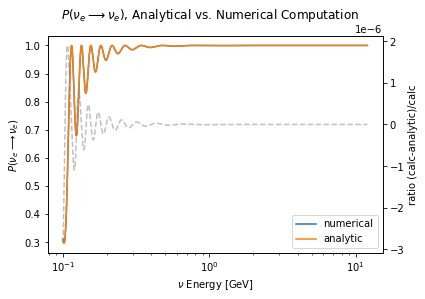

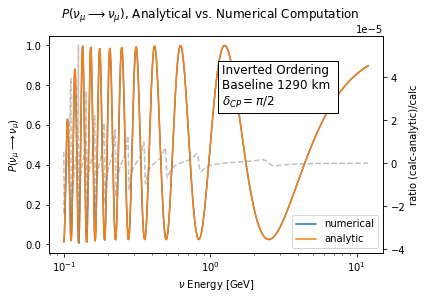

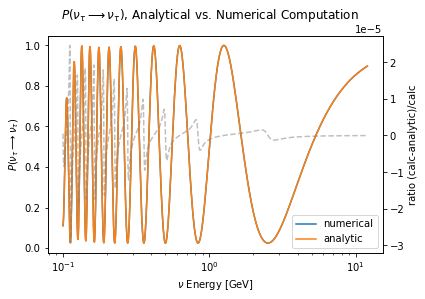

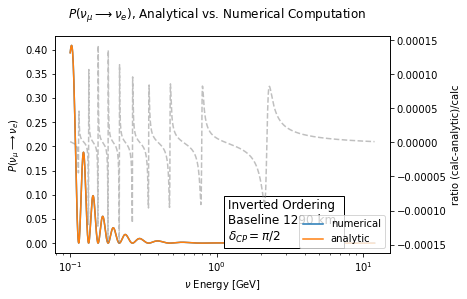

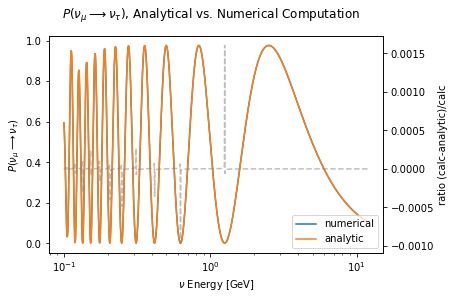

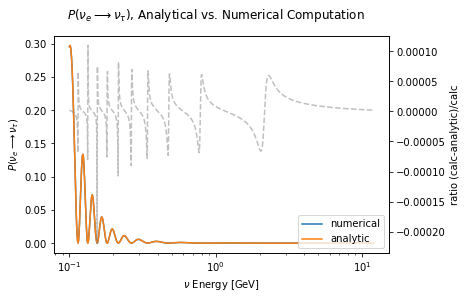

In [78]:
#Fix a baseline, and vary energy and d_cp parameters, compare between calculators. We will use DUNE baseline and ~energies for this

## 1000x the matter density here, and delta_cp = 0
crust.N_e = crust.N_e*100.0

baseline = 1290*km
energies = np.logspace(np.log10(0.1*GeV), np.log10(12*GeV), 1000)
nu = NuNO_nufit_4()
nu.d_cp = 0

ee_calc = []
mm_calc = []
tt_calc = []
em_calc = []
et_calc = []
mt_calc = []
tm_calc = []
te_calc = []
me_calc = []

ee = []
mm = []
tt = []
em = []
et = []
mt = []
tm = []
te = []
me = []

##define this calculator

calc = Neutrino_Oscillation_Calculator(nu, crust)


##define analytic calculator hamiltonian:
h_vacuum_energy_indep = \
        hamiltonians3nu.hamiltonian_3nu_vacuum_energy_independent(  sin(nu.theta_12),
                                                                    sin(nu.theta_23),
                                                                    sin(nu.theta_13),
                                                                    nu.d_cp,
                                                                    nu.dM2_21,
                                                                    nu.dM2_31)

for E in energies:
    # Units of VCC_EARTH_CRUST: [eV]
        h_matter = hamiltonians3nu.hamiltonian_3nu_matter(  h_vacuum_energy_indep,
                                                            E,
                                                            crust.coupling_strength()*nu.mode)
        Pee, Pem, Pet, Pme, Pmm, Pmt, Pte, Ptm, Ptt = \
            oscprob3nu.probabilities_3nu(h_matter, (baseline/km)*CONV_KM_TO_INV_EV)
        
        ee.append(Pee)
        mm.append(Pmm)
        tt.append(Ptt)
        et.append(Pet)
        em.append(Pem)
        mt.append(Pmt)
        te.append(Pte)
        me.append(Pme)
        tm.append(Ptm)
        
        TEV = calc.Time_Evolution___Flavor(E, baseline)
        ee_calc.append(np.absolute(TEV[0][0])**2)
        em_calc.append(np.absolute(TEV[1][0])**2)
        et_calc.append(np.absolute(TEV[2][0])**2)
        mm_calc.append(np.absolute(TEV[1][1])**2)
        tt_calc.append(np.absolute(TEV[2][2])**2)
        mt_calc.append(np.absolute(TEV[2][1])**2)
        me_calc.append(np.absolute(TEV[0][1])**2)
        te_calc.append(np.absolute(TEV[0][2])**2)
        tm_calc.append(np.absolute(TEV[1][2])**2)
        

#do the plotting
fig = plt.figure()
fig.suptitle(r'$P(\nu_e \longrightarrow \nu_e)$, Analytical vs. Numerical Computation')
ax = fig.add_subplot()
ax.plot(energies/GeV, ee_calc, label='numerical')
ax.plot(energies/GeV, ee, label='analytic')
ax.set_xscale('log')
ax.set_xlabel(r'$\nu$ Energy [GeV]')
ax.set_ylabel(r'$P(\nu_e \longrightarrow \nu_e)$')
plt.legend(loc=4)
#ax.text(1.2,0.5, 'Normal Ordering \nBaseline 1290 km \n$\delta_{CP}=\pi/2$', bbox={'facecolor' : 'white' }, fontsize=12 )
ax1 = ax.twinx()
ax1.plot(energies/GeV, np.divide(np.array(ee_calc)-np.array(ee),ee_calc), linestyle='--', color='gray', alpha=0.5)
ax1.set_ylabel('ratio (calc-analytic)/calc')



#####################################################
fig = plt.figure()
fig.suptitle(r'$P(\nu_{\mu} \longrightarrow \nu_{\mu})$, Analytical vs. Numerical Computation')
ax = fig.add_subplot()
ax.plot(energies/GeV, mm_calc, label='numerical')
ax.plot(energies/GeV, mm, label='analytic')
ax.set_xscale('log')
ax.set_xlabel(r'$\nu$ Energy [GeV]')
ax.set_ylabel(r'$P(\nu_{\mu} \longrightarrow \nu_{\mu})$')
plt.legend(loc=4)
ax.text(1.2,0.7, 'Inverted Ordering \nBaseline 1290 km \n$\delta_{CP}=\pi/2$', bbox={'facecolor' : 'white' }, fontsize=12 )
ax1 = ax.twinx()
ax1.plot(energies/GeV, np.divide(np.array(mm_calc)-np.array(mm),mm_calc), linestyle='--', color='gray', alpha=0.5)
ax1.set_ylabel('ratio (calc-analytic)/calc')
fig.savefig(prefix+'mu_mu_high_matter.png')


#####################################################
fig = plt.figure()
fig.suptitle(r'$P(\nu_{\tau} \longrightarrow \nu_{\tau})$, Analytical vs. Numerical Computation')
ax = fig.add_subplot()
ax.plot(energies/GeV, tt_calc, label='numerical')
ax.plot(energies/GeV, tt, label='analytic')
ax.set_xscale('log')
ax.set_xlabel(r'$\nu$ Energy [GeV]')
ax.set_ylabel(r'$P(\nu_{\tau} \longrightarrow \nu_{\tau})$')
plt.legend(loc=4)
#ax.text(1.2,0.7, 'Normal Ordering \nBaseline 1290 km \n$\delta_{CP}=\pi/2$', bbox={'facecolor' : 'white' }, fontsize=12 )
ax1 = ax.twinx()
ax1.plot(energies/GeV, np.divide(np.array(tt_calc)-np.array(tt),tt_calc), linestyle='--', color='gray', alpha=0.5)
ax1.set_ylabel('ratio (calc-analytic)/calc')


#####################################################
fig = plt.figure()
fig.suptitle(r'$P(\nu_{\mu} \longrightarrow \nu_{e})$, Analytical vs. Numerical Computation')
ax = fig.add_subplot()
ax.plot(energies/GeV, me_calc, label='numerical')
ax.plot(energies/GeV, me, label='analytic')
ax.set_xscale('log')
ax.set_xlabel(r'$\nu$ Energy [GeV]')
ax.set_ylabel(r'$P(\nu_{\mu} \longrightarrow \nu_{e})$')
plt.legend(loc=4)
ax.text(1.2,0.006, 'Inverted Ordering \nBaseline 1290 km \n$\delta_{CP}=\pi/2$', bbox={'facecolor' : 'white' }, fontsize=12 )
ax1 = ax.twinx()
ax1.plot(energies/GeV, np.divide(np.array(me_calc)-np.array(me),me_calc), linestyle='--', color='gray', alpha=0.5)
ax1.set_ylabel('ratio (calc-analytic)/calc')
fig.savefig(prefix+'mu_e_high_matter.png')

#####################################################
fig = plt.figure()
fig.suptitle(r'$P(\nu_{\mu} \longrightarrow \nu_{\tau})$, Analytical vs. Numerical Computation')
ax = fig.add_subplot()
ax.plot(energies/GeV, mt_calc, label='numerical')
ax.plot(energies/GeV, mt, label='analytic')
ax.set_xscale('log')
ax.set_xlabel(r'$\nu$ Energy [GeV]')
ax.set_ylabel(r'$P(\nu_{\mu} \longrightarrow \nu_{\tau})$')
plt.legend(loc=4)
#ax.text(1.3,0.6, 'Normal Ordering \nBaseline 1290 km \n$\delta_{CP}=$', bbox={'facecolor' : 'white' }, fontsize=12 )
ax1 = ax.twinx()
ax1.plot(energies/GeV, np.divide(np.array(mt_calc)-np.array(mt),mt_calc), linestyle='--', color='gray', alpha=0.5)
ax1.set_ylabel('ratio (calc-analytic)/calc')


#####################################################
fig = plt.figure()
fig.suptitle(r'$P(\nu_{e} \longrightarrow \nu_{\tau})$, Analytical vs. Numerical Computation')
ax = fig.add_subplot()
ax.plot(energies/GeV, et_calc, label='numerical')
ax.plot(energies/GeV, et, label='analytic')
ax.set_xscale('log')
ax.set_xlabel(r'$\nu$ Energy [GeV]')
ax.set_ylabel(r'$P(\nu_{e} \longrightarrow \nu_{\tau})$')
plt.legend(loc=4)
#ax.text(1.3,0.2, 'Normal Ordering \nBaseline 1290 km \n$\delta_{CP}=\pi/2$', bbox={'facecolor' : 'white' }, fontsize=12 )
ax1 = ax.twinx()
ax1.plot(energies/GeV, np.divide(np.array(et_calc)-np.array(et),et_calc), linestyle='--', color='gray', alpha=0.5)
ax1.set_ylabel('ratio (calc-analytic)/calc')


crust.N_e = crust.N_e/100.
plt.show()
        



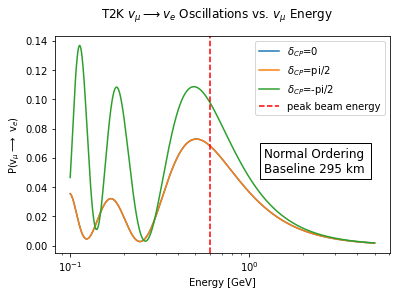

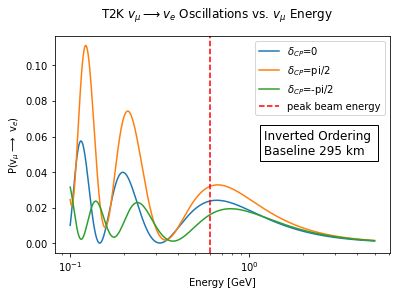

In [8]:
#T2K PLOTS
Es = np.logspace(np.log10(0.1*GeV), np.log10(5*GeV), 1000)
baseline = 295*km
data = []
data_cpv=[]
data_ncpv = []
data_io = []
data_cpv_io=[]
data_ncpv_io = []
crust.N_e = crust.N_e*5
for E in Es:
    h_matter = hamiltonians3nu.hamiltonian_3nu_matter(  h_vacuum_energy_indep,
        E,
        crust.coupling_strength()*nu.mode)
    
    h_matter_cpv = hamiltonians3nu.hamiltonian_3nu_matter(h_vacuum_energy_indep_cpv,
        E,
        crust.coupling_strength()*nu.mode)
    
    h_matter_ncpv = hamiltonians3nu.hamiltonian_3nu_matter(h_vacuum_energy_indep_ncpv,
        E,
        crust.coupling_strength()*nu.mode)
    
    Pee, Pem, Pet, Pme, Pmm, Pmt, Pte, Ptm, Ptt = \
        oscprob3nu.probabilities_3nu(h_matter, (baseline/km)*CONV_KM_TO_INV_EV)
    
    data.append(Pme)
    
    Pee, Pem, Pet, Pme, Pmm, Pmt, Pte, Ptm, Ptt = \
        oscprob3nu.probabilities_3nu(h_matter_cpv, (baseline/km)*CONV_KM_TO_INV_EV)
    
    data_cpv.append(Pme)
    
    Pee, Pem, Pet, Pme, Pmm, Pmt, Pte, Ptm, Ptt = \
        oscprob3nu.probabilities_3nu(h_matter_ncpv, (baseline/km)*CONV_KM_TO_INV_EV)
    
    data_ncpv.append(Pme)
    
    
    h_matter_io = hamiltonians3nu.hamiltonian_3nu_matter(  h_vacuum_energy_indep_io,
        E,
        crust.coupling_strength()*nu.mode)
    
    h_matter_cpv_io = hamiltonians3nu.hamiltonian_3nu_matter(h_vacuum_energy_indep_cpv_io,
        E,
        crust.coupling_strength()*nu.mode)
    
    h_matter_ncpv_io = hamiltonians3nu.hamiltonian_3nu_matter(h_vacuum_energy_indep_ncpv_io,
        E,
        crust.coupling_strength()*nu.mode)
    
    Pee, Pem, Pet, Pme, Pmm, Pmt, Pte, Ptm, Ptt = \
        oscprob3nu.probabilities_3nu(h_matter_io, (baseline/km)*CONV_KM_TO_INV_EV)
    
    data_io.append(Pme)
    
    Pee, Pem, Pet, Pme, Pmm, Pmt, Pte, Ptm, Ptt = \
        oscprob3nu.probabilities_3nu(h_matter_cpv_io, (baseline/km)*CONV_KM_TO_INV_EV)
    
    data_cpv_io.append(Pme)
    
    Pee, Pem, Pet, Pme, Pmm, Pmt, Pte, Ptm, Ptt = \
        oscprob3nu.probabilities_3nu(h_matter_ncpv_io, (baseline/km)*CONV_KM_TO_INV_EV)
    
    data_ncpv_io.append(Pme)
    
crust.N_e = crust.N_e/10
fig = plt.figure()
ax = fig.add_subplot()
fig.suptitle('T2K $v_{\mu} \longrightarrow v_e$ Oscillations vs. $v_{\mu}$ Energy')
ax.plot(Es/GeV, data, label='$\delta_{CP}$=0')
ax.plot(Es/GeV, data_cpv, label='$\delta_{CP}$=pi/2')
ax.plot(Es/GeV, data_ncpv, label='$\delta_{CP}$=-pi/2')
ax.text(1.2,0.05, 'Normal Ordering \nBaseline 295 km', bbox={'facecolor' : 'white' }, fontsize=12 )
plt.axvline(x=0.6, color='red', linestyle='--', label='peak beam energy')
ax.set_xscale('log')
ax.set_xlabel('Energy [GeV]')
ax.set_ylabel('P(v$_{\mu} \longrightarrow$ v$_{e}$)')
plt.legend()

fig = plt.figure()
ax = fig.add_subplot()
fig.suptitle('T2K $v_{\mu} \longrightarrow v_{e}$ Oscillations vs. $v_{\mu}$ Energy')
ax.plot(Es/GeV, data_io, label='$\delta_{CP}$=0')
ax.plot(Es/GeV, data_cpv_io, label='$\delta_{CP}$=pi/2')
ax.plot(Es/GeV, data_ncpv_io, label='$\delta_{CP}$=-pi/2')
ax.text(1.2,0.05, 'Inverted Ordering \nBaseline 295 km', bbox={'facecolor' : 'white' }, fontsize=12 )
plt.axvline(x=0.6, color='red', linestyle='--', label='peak beam energy')
ax.set_xscale('log')
ax.set_xlabel('Energy [GeV]')
ax.set_ylabel('P(v$_{\mu} \longrightarrow$ v$_{e}$)')
plt.legend()
plt.show() 

In [12]:
#DUNE PLOTS
Es = np.logspace(np.log10(0.5*GeV), np.log10(10*GeV), 1000)
baseline = 1284.9*km
data = []
data_cpv=[]
data_ncpv = []
data_io = []
data_cpv_io=[]
data_ncpv_io = []
for E in Es:
    h_matter = hamiltonians3nu.hamiltonian_3nu_matter(  h_vacuum_energy_indep,
        E,
        crust.coupling_strength()*nu.mode)
    
    h_matter_cpv = hamiltonians3nu.hamiltonian_3nu_matter(h_vacuum_energy_indep_cpv,
        E,
        crust.coupling_strength()*nu.mode)
    
    h_matter_ncpv = hamiltonians3nu.hamiltonian_3nu_matter(h_vacuum_energy_indep_ncpv,
        E,
        crust.coupling_strength()*nu.mode)
    
    Pee, Pem, Pet, Pme, Pmm, Pmt, Pte, Ptm, Ptt = \
        oscprob3nu.probabilities_3nu(h_matter, (baseline/km)*CONV_KM_TO_INV_EV)
    
    data.append(Pme)
    
    Pee, Pem, Pet, Pme, Pmm, Pmt, Pte, Ptm, Ptt = \
        oscprob3nu.probabilities_3nu(h_matter_cpv, (baseline/km)*CONV_KM_TO_INV_EV)
    
    data_cpv.append(Pme)
    
    Pee, Pem, Pet, Pme, Pmm, Pmt, Pte, Ptm, Ptt = \
        oscprob3nu.probabilities_3nu(h_matter_ncpv, (baseline/km)*CONV_KM_TO_INV_EV)
    
    data_ncpv.append(Pme)
    
    
    
    
    h_matter_io = hamiltonians3nu.hamiltonian_3nu_matter(  h_vacuum_energy_indep_io,
        E,
        crust.coupling_strength()*nu.mode)
    
    h_matter_cpv_io = hamiltonians3nu.hamiltonian_3nu_matter(h_vacuum_energy_indep_cpv_io,
        E,
        crust.coupling_strength()*nu.mode)
    
    h_matter_ncpv_io = hamiltonians3nu.hamiltonian_3nu_matter(h_vacuum_energy_indep_ncpv_io,
        E,
        crust.coupling_strength()*nu.mode)
    
    Pee, Pem, Pet, Pme, Pmm, Pmt, Pte, Ptm, Ptt = \
        oscprob3nu.probabilities_3nu(h_matter_io, (baseline/km)*CONV_KM_TO_INV_EV)
    
    data_io.append(Pme)
    
    Pee, Pem, Pet, Pme, Pmm, Pmt, Pte, Ptm, Ptt = \
        oscprob3nu.probabilities_3nu(h_matter_cpv_io, (baseline/km)*CONV_KM_TO_INV_EV)
    
    data_cpv_io.append(Pme)
    
    Pee, Pem, Pet, Pme, Pmm, Pmt, Pte, Ptm, Ptt = \
        oscprob3nu.probabilities_3nu(h_matter_ncpv_io, (baseline/km)*CONV_KM_TO_INV_EV)
    
    data_ncpv_io.append(Pme)
    

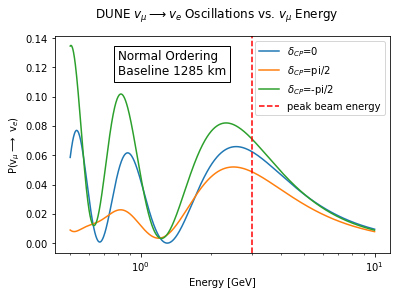

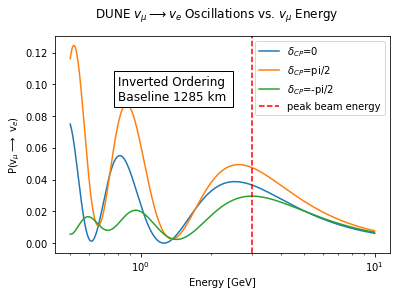

In [13]:
fig = plt.figure()
ax = fig.add_subplot()
fig.suptitle('DUNE $v_{\mu} \longrightarrow v_e$ Oscillations vs. $v_{\mu}$ Energy')
ax.plot(Es/GeV, data, label='$\delta_{CP}$=0')
ax.plot(Es/GeV, data_cpv, label='$\delta_{CP}$=pi/2')
ax.plot(Es/GeV, data_ncpv, label='$\delta_{CP}$=-pi/2')
ax.text(0.8,0.115, 'Normal Ordering \nBaseline 1285 km', bbox={'facecolor' : 'white' }, fontsize=12 )
plt.axvline(x=3, color='red', linestyle='--', label='peak beam energy')
ax.set_xscale('log')
ax.set_xlabel('Energy [GeV]')
ax.set_ylabel('P(v$_{\mu} \longrightarrow$ v$_{e}$)')
plt.legend()

fig = plt.figure()
ax = fig.add_subplot()
fig.suptitle('DUNE $v_{\mu} \longrightarrow v_{e}$ Oscillations vs. $v_{\mu}$ Energy')
ax.plot(Es/GeV, data_io, label='$\delta_{CP}$=0')
ax.plot(Es/GeV, data_cpv_io, label='$\delta_{CP}$=pi/2')
ax.plot(Es/GeV, data_ncpv_io, label='$\delta_{CP}$=-pi/2')
ax.text(0.8,0.09, 'Inverted Ordering \nBaseline 1285 km', bbox={'facecolor' : 'white' }, fontsize=12 )
plt.axvline(x=3, color='red', linestyle='--', label='peak beam energy')
ax.set_xscale('log')
ax.set_xlabel('Energy [GeV]')
ax.set_ylabel('P(v$_{\mu} \longrightarrow$ v$_{e}$)')
plt.legend()
plt.show() 

Now that we have established a working calculator, we will look to convolve these plots with the full spectrum of the NuMI beam for the DUNE experiment. To do this:

-Import NuMI beam simulation data from 2x2 simulation for energy spectrum
-Fit beam to non-parametric function using Gaussian Process Regression
-Plot (oscillated) detected nu energy spectrum 

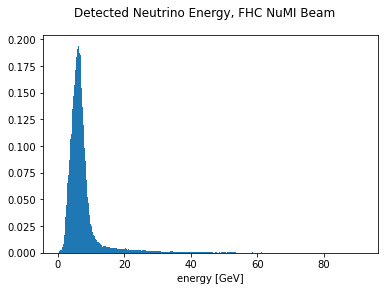

In [67]:
import h5py
f = h5py.File('/Users/stephengreenberg/lbnl/protodune-nd/test/spill_analysis/spill_analysis/data/fhc/combined.h5')
fig = plt.figure()
fig.suptitle('Detected Neutrino Energy, FHC NuMI Beam')
ax = fig.add_subplot()
fhc_energy_data = f['data']['nu_i_energy']/1000.0
vals = ax.hist(fhc_energy_data, bins=500, density=True);
ax.set_xlabel('energy [GeV]')
plt.show()

/Users/stephengreenberg/miniconda3/envs/larpix/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


45.632696225523944 0.042484327912330644


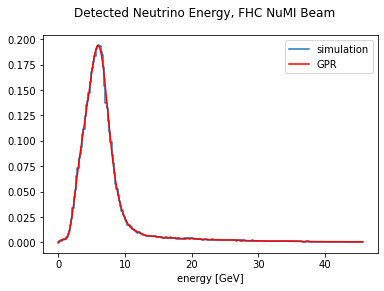

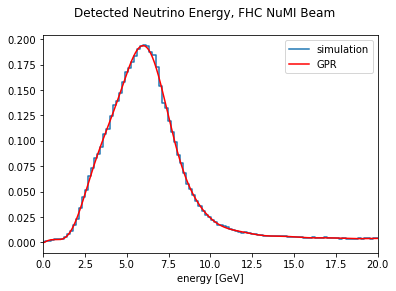

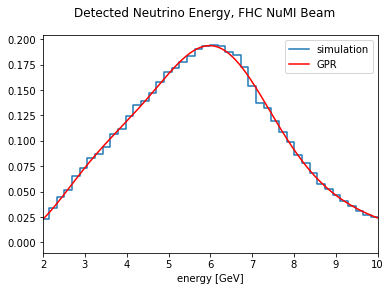

In [68]:
#unpacking the data
npts= 250
fhc_energy_data = vals[0][0:npts]
fhc_energy_values = ( vals[1][:-1] + (vals[1][:-1] - vals[1][1:])/2)[0:npts]

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern

kernel = Matern(length_scale=5, nu=15)
gpr = GaussianProcessRegressor(kernel=kernel,random_state=0).fit(np.array([fhc_energy_values]).transpose(), fhc_energy_data)

def numi_fhc_pdf(energy):
    return gpr.predict([ [energy] ])

min_energy = min(fhc_energy_values)
max_energy = max(fhc_energy_values)
print(max_energy, min_energy)
bin_size = (max_energy-min_energy)/npts
def numi_fhc_pdf_exact(energy):
    return fhc_energy_data[ int(np.floor((energy-min_energy)/bin_size))-1  ]

test_points = np.linspace(0, max(fhc_energy_values), 4000)

fig = plt.figure()
fig.suptitle('Detected Neutrino Energy, FHC NuMI Beam')
ax = fig.add_subplot()
ax.plot(fhc_energy_values, fhc_energy_data, label='simulation', drawstyle='steps-mid');
plt.plot(test_points, [numi_fhc_pdf(point) for point in test_points], label='GPR', c='red')
ax.set_xlabel('energy [GeV]')
plt.legend()
plt.show()

fig = plt.figure()
fig.suptitle('Detected Neutrino Energy, FHC NuMI Beam')
ax = fig.add_subplot()
ax.plot(fhc_energy_values, fhc_energy_data, label='simulation', drawstyle='steps-mid');
plt.plot(test_points, [numi_fhc_pdf(point) for point in test_points], label='GPR', c='red')
ax.set_xlabel('energy [GeV]')
plt.xlim((0, 20))
plt.legend()
plt.show()

fig = plt.figure()
fig.suptitle('Detected Neutrino Energy, FHC NuMI Beam')
ax = fig.add_subplot()
ax.plot(fhc_energy_values, fhc_energy_data, label='simulation', drawstyle='steps-mid');
plt.plot(test_points, [numi_fhc_pdf(point) for point in test_points], label='GPR', c='red')
ax.set_xlabel('energy [GeV]')
plt.xlim((2, 10))
plt.legend()
plt.show()

__We are now ready to plot the predicted beam spectrum__

We are doing normal ordering only, as a demonstration

In [69]:
#DUNE PLOTS
Es = np.logspace(np.log10(0.2*GeV), np.log10(15*GeV), 2000)
baseline = 1284.9*km
data = []
data_cpv=[]
data_ncpv = []
for E in Es:
    h_matter = hamiltonians3nu.hamiltonian_3nu_matter(  h_vacuum_energy_indep,
        E,
        crust.coupling_strength()*nu.mode)
    
    h_matter_cpv = hamiltonians3nu.hamiltonian_3nu_matter(h_vacuum_energy_indep_cpv,
        E,
        crust.coupling_strength()*nu.mode)
    
    h_matter_ncpv = hamiltonians3nu.hamiltonian_3nu_matter(h_vacuum_energy_indep_ncpv,
        E,
        crust.coupling_strength()*nu.mode)
    
    Pee, Pem, Pet, Pme, Pmm, Pmt, Pte, Ptm, Ptt = \
        oscprob3nu.probabilities_3nu(h_matter, (baseline/km)*CONV_KM_TO_INV_EV)
    
    data.append(Pme*numi_fhc_pdf(E/GeV))
    
    Pee, Pem, Pet, Pme, Pmm, Pmt, Pte, Ptm, Ptt = \
        oscprob3nu.probabilities_3nu(h_matter_cpv, (baseline/km)*CONV_KM_TO_INV_EV)
    
    data_cpv.append(Pme*numi_fhc_pdf(E/GeV))
    
    Pee, Pem, Pet, Pme, Pmm, Pmt, Pte, Ptm, Ptt = \
        oscprob3nu.probabilities_3nu(h_matter_ncpv, (baseline/km)*CONV_KM_TO_INV_EV)
    
    data_ncpv.append(Pme*numi_fhc_pdf(E/GeV))


__NOTE: this assumes the same cross section for v_mu and v_e which is not the case__

This is just a demonstration of how to oscillate a full energy spectrum at fixed baseline

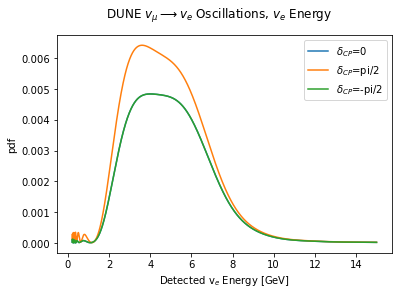

In [70]:

fig = plt.figure()
ax = fig.add_subplot()
fig.suptitle('DUNE $v_{\mu} \longrightarrow v_e$ Oscillations, $v_{e}$ Energy')
ax.plot(Es/GeV, data, label='$\delta_{CP}$=0')
ax.plot(Es/GeV, data_cpv, label='$\delta_{CP}$=pi/2')
ax.plot(Es/GeV, data_ncpv, label='$\delta_{CP}$=-pi/2')
#ax.text(0.8,0.115, 'Normal Ordering \nBaseline 1285 km', bbox={'facecolor' : 'white' }, fontsize=12 )
#ax.set_xscale('log')
ax.set_xlabel('Detected v$_e$ Energy [GeV]')
ax.set_ylabel('pdf')
plt.legend()

In [71]:
#DUNE PLOTS
Es = np.logspace(np.log10(0.2*GeV), np.log10(15*GeV), 2000)
baseline = 1284.9*km
data = []
data_cpv=[]
data_ncpv = []
for E in Es:
    h_matter = hamiltonians3nu.hamiltonian_3nu_matter(  h_vacuum_energy_indep,
        E,
        crust.coupling_strength()*nu.mode)
    
    h_matter_cpv = hamiltonians3nu.hamiltonian_3nu_matter(h_vacuum_energy_indep_cpv,
        E,
        crust.coupling_strength()*nu.mode)
    
    h_matter_ncpv = hamiltonians3nu.hamiltonian_3nu_matter(h_vacuum_energy_indep_ncpv,
        E,
        crust.coupling_strength()*nu.mode)
    
    Pee, Pem, Pet, Pme, Pmm, Pmt, Pte, Ptm, Ptt = \
        oscprob3nu.probabilities_3nu(h_matter, (baseline/km)*CONV_KM_TO_INV_EV)
    
    data.append(Pmm*numi_fhc_pdf(E/GeV))
    
    Pee, Pem, Pet, Pme, Pmm, Pmt, Pte, Ptm, Ptt = \
        oscprob3nu.probabilities_3nu(h_matter_cpv, (baseline/km)*CONV_KM_TO_INV_EV)
    
    data_cpv.append(Pmm*numi_fhc_pdf(E/GeV))
    
    Pee, Pem, Pet, Pme, Pmm, Pmt, Pte, Ptm, Ptt = \
        oscprob3nu.probabilities_3nu(h_matter_ncpv, (baseline/km)*CONV_KM_TO_INV_EV)
    
    data_ncpv.append(Pmm*numi_fhc_pdf(E/GeV))


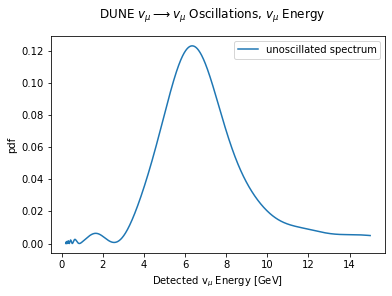

In [278]:
fig = plt.figure()
ax = fig.add_subplot()
fig.suptitle('DUNE $v_{\mu} \longrightarrow v_{\mu}$ Oscillations, $v_{\mu}$ Energy')
ax.plot(Es/GeV, data, label='unoscillated spectrum')
#ax.text(0.8,0.115, 'Normal Ordering \nBaseline 1285 km', bbox={'facecolor' : 'white' }, fontsize=12 )
#plt.axvline(x=6, color='red', linestyle='--', label='peak beam energy')
#ax.set_xscale('log')
ax.set_xlabel('Detected v$_{\mu}$ Energy [GeV]')
ax.set_ylabel('pdf')
plt.legend()

In [7]:
import ROOT as root

Welcome to JupyROOT 6.26/04


In [8]:
f = root.TFile('/Users/stephengreenberg/lbnl/phys/genie_xsec/v3_02_00/NULL/G1802a00000-k250-e1000/data/xsec_graphs.root')

In [12]:
nu_e_bar_Ar40_cc_tot = f.Get('nu_e_bar_Ar40/tot_cc') 
nu_e_Ar40_cc_tot = f.Get('nu_e_Ar40/tot_cc') 
nu_mu_bar_Ar40_cc_tot = f.Get('nu_mu_bar_Ar40/tot_cc') 
nu_mu_Ar40_cc_tot = f.Get('nu_mu_Ar40/tot_cc') 

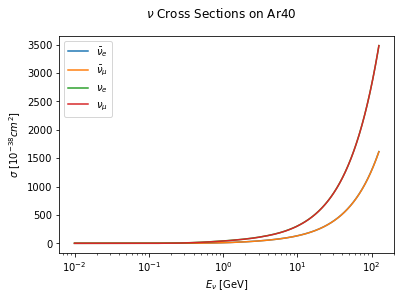

In [13]:
fig = plt.figure()
ax = fig.add_subplot()
fig.suptitle(r'$\nu$ Cross Sections on Ar40')
ax.plot(nu_e_bar_Ar40_cc_tot.GetX(), nu_e_bar_Ar40_cc_tot.GetY(), label=r'$\bar{\nu}_e$' )
ax.plot(nu_mu_bar_Ar40_cc_tot.GetX(), nu_mu_bar_Ar40_cc_tot.GetY(), label=r'$\bar{\nu}_{\mu}$' )
ax.plot(nu_e_Ar40_cc_tot.GetX(), nu_e_Ar40_cc_tot.GetY(), label=r'$\nu_e$' )
ax.plot(nu_mu_Ar40_cc_tot.GetX(), nu_mu_Ar40_cc_tot.GetY(), label=r'$\nu_\mu$' )
ax.set_xlabel(r'$E_{\nu}$ [GeV]')
ax.set_ylabel(r'$\sigma$ [$10^{-38} cm^2$]')
plt.legend()
ax.set_xscale('log')

In [14]:
materials = set()
for key in f.GetListOfKeys():
    materials.add(key.GetName().split('_')[-1])
print(materials)

{'Ar40', 'H2', 'Cu64', 'Ti48', 'Xe131', 'N14', 'C12', 'O16', 'Cl35', 'Al27', 'Ca40', 'Sn119', 'Mg24', 'Na23', 'Fe56', 'n', 'Si28', 'P31', 'Mn55', 'S32', 'H1'}


0.01
0.13511511511511512
0.26023023023023023
0.38534534534534537
0.5104604604604605
0.6355755755755755
0.7606906906906907
0.8858058058058058
1.010920920920921
1.136036036036036
1.261151151151151
1.3862662662662661
1.5113813813813815
1.6364964964964965
1.7616116116116116
1.8867267267267267
2.0118418418418416
2.136956956956957
2.2620720720720717
2.387187187187187
2.512302302302302
2.637417417417417
2.762532532532532
2.8876476476476474
3.0127627627627627
3.1378778778778775
3.262992992992993
3.3881081081081077
3.513223223223223
3.638338338338338
3.763453453453453
3.888568568568568
4.013683683683683
4.138798798798798
4.263913913913914
4.389029029029029
4.514144144144144
4.6392592592592585
4.764374374374374
4.889489489489489
5.014604604604604
5.13971971971972
5.264834834834835
5.3899499499499495
5.515065065065064
5.64018018018018
5.765295295295295
5.89041041041041
6.0155255255255256
6.14064064064064
6.265755755755755
6.39087087087087
6.515985985985986
6.641101101101101
6.766216216216216
6.89

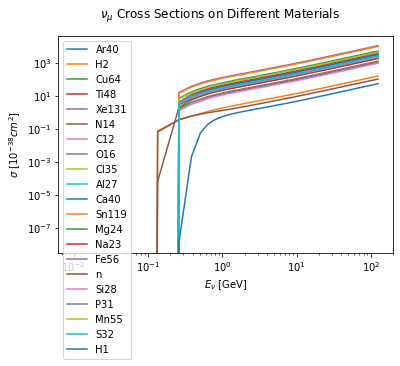

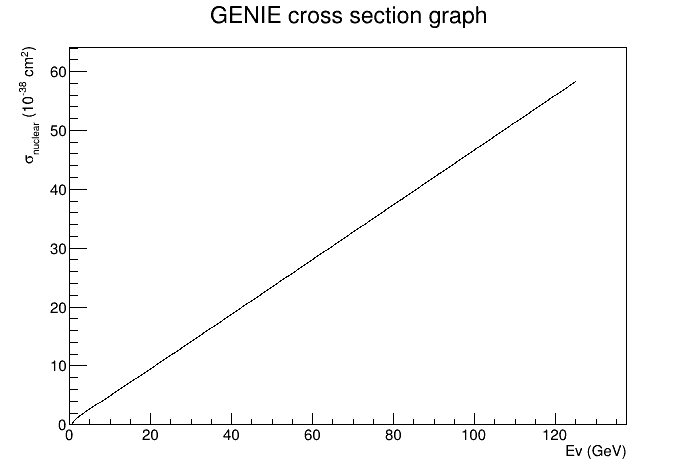

In [15]:
fig = plt.figure()
ax = fig.add_subplot()
fig.suptitle(r'$\nu_{\mu}$ Cross Sections on Different Materials')
for mat in list(materials):
    data = f.Get('nu_mu_' + mat + '/tot_cc')
    c1 = root.TCanvas()
    data.Draw()
    c1.Draw()
    
    ax.plot(data.GetX(), data.GetY(), label=mat )
    
    for val in data.GetX(): print(val)

ax.set_xlabel(r'$E_{\nu}$ [GeV]')
ax.set_ylabel(r'$\sigma$ [$10^{-38} cm^2$]')
plt.legend()
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

In [16]:
def get_xs(material, energy, process='tot_cc', nu='nu_mu'):
    data = f.Get(nu+'_'+ mat + '/tot_cc')
    datax, datay = np.array(data.GetX()), np.array(data.GetY())
    resolution = datax[1]-datax[0]
    return datay[np.where(np.logical_and(datax<(energy+resolution/2), datax>(energy-resolution/2)))[0][0]]

In [17]:
get_xs('Ar40', 1.1)

0.6890596862452234

[1.1827993875175122e-05]
[0.0]
[0.0]
[0.0]


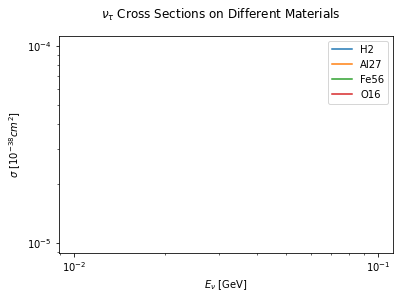

In [55]:
mats = ['H2', 'Al27', 'Fe56', 'O16']
fig = plt.figure()
ax = fig.add_subplot()
fig.suptitle(r'$\nu_{\tau}$ Cross Sections on Different Materials')
energies = [0.029]#np.linspace(0.001, 10, 1000)
for mat in list(mats): 
    xs = []
    for energy in energies:
        xs.append(get_xs(mat, energy, nu='nu_e_bar', process='tot'))
        print(xs)
    ax.plot(energies, xs, label=mat)
        
ax.set_xlabel(r'$E_{\nu}$ [GeV]')
ax.set_ylabel(r'$\sigma$ [$10^{-38} cm^2$]')
plt.legend()
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

In [11]:
ff = root.TFile('DUNE_OptimizedEngineeredNov2017_REGULAR.root')

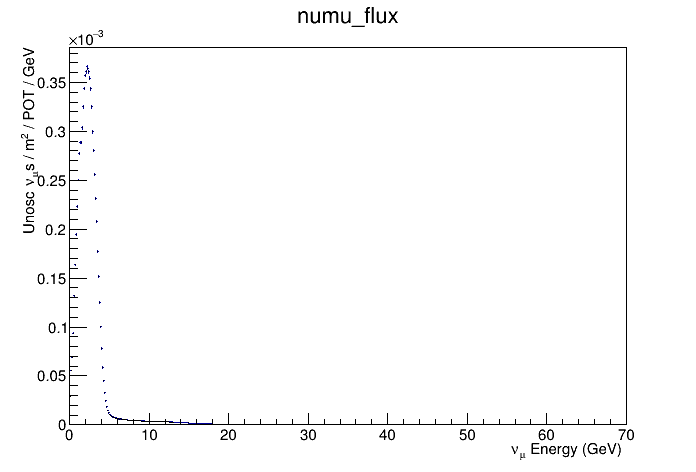

In [14]:
data = ff.Get('numu_NDFHC_flux');
c = root.TCanvas()
data.Draw()
c.Draw()

In [58]:
draw_flux_root()

In [12]:
ff.ls()
def get_flux(nu='numu', det='ND', hc='FHC'):
    data = root.TGraph(ff.Get(nu + '_' + det + hc + '_flux'));
    datax, datay = np.array(data.GetX()), np.array(data.GetY())
    return datax, datay

def get_flux_bin(energy, nu='numu', det='ND', hc='FHC'):
    data = root.TGraph(ff.Get(nu + '_' + det + hc + '_flux'));
    datax, datay = np.array(data.GetX()), np.array(data.GetY())
    resolution = datax[1]-datax[0]
    return datay[np.where(np.logical_and(datax<(energy+resolution/2), datax>(energy-resolution/2)))[0][0]]

TFile**		DUNE_OptimizedEngineeredNov2017_REGULAR.root	
 TFile*		DUNE_OptimizedEngineeredNov2017_REGULAR.root	
  KEY: TH1D	numu_NDRHC_flux;1	numu_flux
  KEY: TH1D	numubar_NDRHC_flux;1	numubar_flux
  KEY: TH1D	nue_NDRHC_flux;1	nue_flux
  KEY: TH1D	nuebar_NDRHC_flux;1	nuebar_flux
  KEY: TH1D	numu_NDFHC_flux;1	numu_flux
  KEY: TH1D	numubar_NDFHC_flux;1	numubar_flux
  KEY: TH1D	nue_NDFHC_flux;1	nue_flux
  KEY: TH1D	nuebar_NDFHC_flux;1	nuebar_flux
  KEY: TH1D	numu_FDRHC_flux;1	numu_flux
  KEY: TH1D	numubar_FDRHC_flux;1	numubar_flux
  KEY: TH1D	nue_FDRHC_flux;1	nue_flux
  KEY: TH1D	nuebar_FDRHC_flux;1	nuebar_flux
  KEY: TH1D	numu_FDFHC_flux;1	numu_flux
  KEY: TH1D	numubar_FDFHC_flux;1	numubar_flux
  KEY: TH1D	nue_FDFHC_flux;1	nue_flux
  KEY: TH1D	nuebar_FDFHC_flux;1	nuebar_flux


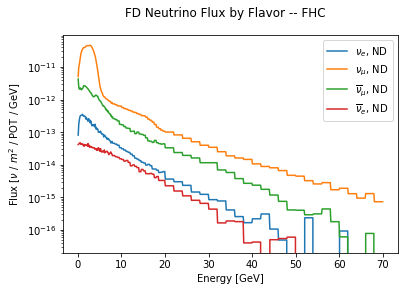

In [88]:
numux, numuy = get_flux(det='FD')
nuex, nuey = get_flux(nu='nue', det='FD')
nuebarx, nuebary = get_flux(nu='nuebar', det='FD')
numubarx, numubary = get_flux(nu='numubar', det='FD')

fig = plt.figure()
fig.suptitle('FD Neutrino Flux by Flavor -- FHC')
ax = fig.add_subplot()
ax.set_xlabel('Energy [GeV]')
ax.set_ylabel(r'Flux [$\nu$ / $m^2$ / POT / GeV]')
plt.plot(nuex, nuey, label=r'$\nu_e$, ND')
plt.plot(numux, numuy, label=r'$\nu_\mu$, ND')
plt.plot(numubarx, numubary, label=r'$\overline{\nu}_\mu$, ND')
plt.plot(nuebarx, nuebary, label=r'$\overline{\nu}_e$, ND')
ax.set_yscale('log')
#ax.set_xscale('log')
ax.legend()

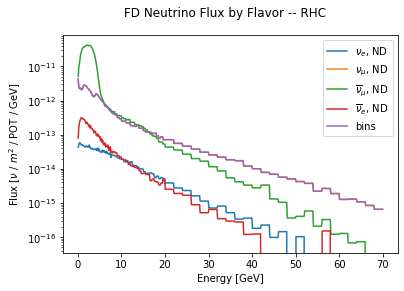

In [92]:
numux, numuy = get_flux(hc='RHC',det='FD')
nuex, nuey = get_flux(nu='nue', hc='RHC', det='FD')
nuebarx, nuebary = get_flux(nu='nuebar', hc='RHC', det='FD')
numubarx, numubary = get_flux(nu='numubar', hc='RHC', det='FD')

fig = plt.figure()
fig.suptitle('FD Neutrino Flux by Flavor -- RHC')
ax = fig.add_subplot()
ax.set_xlabel('Energy [GeV]')
ax.set_ylabel(r'Flux [$\nu$ / $m^2$ / POT / GeV]')
plt.plot(nuex, nuey, label=r'$\nu_e$, ND')
plt.plot(numux, numuy, label=r'$\nu_\mu$, ND')
plt.plot(numubarx, numubary, label=r'$\overline{\nu}_\mu$, ND')
plt.plot(nuebarx, nuebary, label=r'$\overline{\nu}_e$, ND')
plt.plot(numux, [get_flux_bin(e, hc='RHC',det='FD') for e in numux], label='bins')
ax.set_yscale('log')
#ax.set_xscale('log')
ax.legend()

In [163]:
#CALCULATE DUNE SPECTRUM

baseline = 1295*km
dcp = 0

numux, numuy = get_flux(hc='FHC',det='FD')
energies = numux
nuno = NuNO_nufit_4()
nuio = NuIO_nufit_4()
nunob = NuNO_nufit_4()
nuiob = NuIO_nufit_4()
nunob.mode = -1
nuiob.mode = -1
nuno.d_cp = dcp
nuio.d_cp = dcp
nunob.d_cp = dcp
nuiob.d_cp = dcp

##define this calculator
calcno = Neutrino_Oscillation_Calculator(nuno, crust)
calcio = Neutrino_Oscillation_Calculator(nuio, crust)
calcnob = Neutrino_Oscillation_Calculator(nunob, crust)
calciob = Neutrino_Oscillation_Calculator(nuiob, crust)


flux_e_no = []
flux_mu_no = []

flux_e_io = []
flux_mu_io = []

flux_eb_no = []
flux_mub_no = []

flux_eb_io = []
flux_mub_io = []

osc_flux_e_no = []
osc_flux_mu_no = []

osc_flux_e_io = []
osc_flux_mu_io = []

osc_flux_eb_no = []
osc_flux_mub_no = []

osc_flux_eb_io = []
osc_flux_mub_io = []

sig_e_no = []
sig_mu_no = []

sig_e_io = []
sig_mu_io = []

sig_eb_no = []
sig_mub_no = []

sig_eb_io = []
sig_mub_io = []

mat = 'Ar40'
for E in energies:
    
        TEVno = calcno.Time_Evolution___Flavor(E*GeV, baseline)
        TEVio = calcio.Time_Evolution___Flavor(E*GeV, baseline)
        TEVnob = calcnob.Time_Evolution___Flavor(E*GeV, baseline)
        TEViob = calciob.Time_Evolution___Flavor(E*GeV, baseline)
        
        
        eeno = np.absolute(TEVno[0][0])**2
        emno = np.absolute(TEVno[1][0])**2
        mmno = np.absolute(TEVno[1][1])**2
        meno = np.absolute(TEVno[0][1])**2
        
        eeio = np.absolute(TEVio[0][0])**2
        emio = np.absolute(TEVio[1][0])**2
        mmio = np.absolute(TEVio[1][1])**2
        meio = np.absolute(TEVio[0][1])**2
        
        eenob = np.absolute(TEVnob[0][0])**2
        emnob = np.absolute(TEVnob[1][0])**2
        mmnob = np.absolute(TEVnob[1][1])**2
        menob = np.absolute(TEVnob[0][1])**2
        
        eeiob = np.absolute(TEViob[0][0])**2
        emiob = np.absolute(TEViob[1][0])**2
        mmiob = np.absolute(TEViob[1][1])**2
        meiob = np.absolute(TEViob[0][1])**2
        
        ef_FHC = get_flux_bin(E, nu='nue', det='FD')
        mf_FHC = get_flux_bin(E, nu='numu', det='FD')
        
        ef_RHC = get_flux_bin(E, nu='nuebar', det='FD', hc='RHC')
        mf_RHC = get_flux_bin(E, nu='numubar', det='FD', hc='RHC')
        
        ee_xs = get_xs(mat, E, nu='nu_e')
        mm_xs = get_xs(mat, E, nu='nu_mu')
        
        eeb_xs = get_xs(mat, E, nu='nu_e_bar')
        mmb_xs = get_xs(mat, E, nu='nu_mu_bar')
        
        
        flux_e_no.append(ef_FHC)
        flux_mu_no.append(mf_FHC)
        flux_e_io.append(ef_FHC)
        flux_mu_io.append(mf_FHC)
        
        flux_eb_no.append(ef_RHC)
        flux_mub_no.append(mf_RHC)
        flux_eb_io.append(ef_RHC)
        flux_mub_io.append(mf_RHC)
        
        osc_flux_e_no.append(ef_FHC*eeno + emno*mf_FHC)
        osc_flux_mu_no.append(mf_FHC*mmno + ef_FHC*emno)
        osc_flux_e_io.append(ef_FHC*eeio + emio*mf_FHC)
        osc_flux_mu_io.append(mf_FHC*mmio + ef_FHC*emio)
        
        osc_flux_eb_no.append(ef_RHC*eenob + emnob*mf_RHC)
        osc_flux_mub_no.append(mf_RHC*mmnob + ef_RHC*emnob)
        osc_flux_eb_io.append(ef_RHC*eeiob + emiob*mf_RHC)
        osc_flux_mub_io.append(mf_RHC*mmiob + ef_RHC*emiob)
        
        sig_e_no.append( (ef_FHC*eeno + emno*mf_FHC)*ee_xs )
        sig_mu_no.append( (mf_FHC*mmno + ef_FHC*emno)*mm_xs )
        sig_e_io.append( (ef_FHC*eeio + emio*mf_FHC)*ee_xs )
        sig_mu_io.append( (mf_FHC*mmio + ef_FHC*emio)*mm_xs )
        
        sig_eb_no.append( (ef_RHC*eenob + emnob*mf_RHC)*eeb_xs )
        sig_mub_no.append( (mf_RHC*mmnob + ef_RHC*emnob)*mmb_xs )
        sig_eb_io.append(  (ef_RHC*eeiob + emiob*mf_RHC)*eeb_xs )
        sig_mub_io.append( (mf_RHC*mmiob + ef_RHC*emiob)*mmb_xs )
        
        
osc_flux_eb_no_dcp_0 = osc_flux_eb_no.copy()
osc_flux_e_no_dcp_0 = osc_flux_e_no.copy()

sig_eb_no_dcp_0 = sig_eb_no.copy()
sig_e_no_dcp_0 = sig_e_no.copy()

In [164]:
#CALCULATE DUNE SPECTRUM

baseline = 1295*km
dcp = np.pi/2

numux, numuy = get_flux(hc='FHC',det='FD')
energies = numux
nuno = NuNO_nufit_4()
nuio = NuIO_nufit_4()
nunob = NuNO_nufit_4()
nuiob = NuIO_nufit_4()
nunob.mode = -1
nuiob.mode = -1
nuno.d_cp = dcp
nuio.d_cp = dcp
nunob.d_cp = dcp
nuiob.d_cp = dcp

##define this calculator
calcno = Neutrino_Oscillation_Calculator(nuno, crust)
calcio = Neutrino_Oscillation_Calculator(nuio, crust)
calcnob = Neutrino_Oscillation_Calculator(nunob, crust)
calciob = Neutrino_Oscillation_Calculator(nuiob, crust)


flux_e_no = []
flux_mu_no = []

flux_e_io = []
flux_mu_io = []

flux_eb_no = []
flux_mub_no = []

flux_eb_io = []
flux_mub_io = []

osc_flux_e_no = []
osc_flux_mu_no = []

osc_flux_e_io = []
osc_flux_mu_io = []

osc_flux_eb_no = []
osc_flux_mub_no = []

osc_flux_eb_io = []
osc_flux_mub_io = []

sig_e_no = []
sig_mu_no = []

sig_e_io = []
sig_mu_io = []

sig_eb_no = []
sig_mub_no = []

sig_eb_io = []
sig_mub_io = []

mat = 'Ar40'
for E in energies:
    
        TEVno = calcno.Time_Evolution___Flavor(E*GeV, baseline)
        TEVio = calcio.Time_Evolution___Flavor(E*GeV, baseline)
        TEVnob = calcnob.Time_Evolution___Flavor(E*GeV, baseline)
        TEViob = calciob.Time_Evolution___Flavor(E*GeV, baseline)
        
        
        eeno = np.absolute(TEVno[0][0])**2
        emno = np.absolute(TEVno[1][0])**2
        mmno = np.absolute(TEVno[1][1])**2
        meno = np.absolute(TEVno[0][1])**2
        
        eeio = np.absolute(TEVio[0][0])**2
        emio = np.absolute(TEVio[1][0])**2
        mmio = np.absolute(TEVio[1][1])**2
        meio = np.absolute(TEVio[0][1])**2
        
        eenob = np.absolute(TEVnob[0][0])**2
        emnob = np.absolute(TEVnob[1][0])**2
        mmnob = np.absolute(TEVnob[1][1])**2
        menob = np.absolute(TEVnob[0][1])**2
        
        eeiob = np.absolute(TEViob[0][0])**2
        emiob = np.absolute(TEViob[1][0])**2
        mmiob = np.absolute(TEViob[1][1])**2
        meiob = np.absolute(TEViob[0][1])**2
        
        ef_FHC = get_flux_bin(E, nu='nue', det='FD')
        mf_FHC = get_flux_bin(E, nu='numu', det='FD')
        
        ef_RHC = get_flux_bin(E, nu='nuebar', det='FD', hc='RHC')
        mf_RHC = get_flux_bin(E, nu='numubar', det='FD', hc='RHC')
        
        ee_xs = get_xs(mat, E, nu='nu_e')
        mm_xs = get_xs(mat, E, nu='nu_mu')
        
        eeb_xs = get_xs(mat, E, nu='nu_e_bar')
        mmb_xs = get_xs(mat, E, nu='nu_mu_bar')
        
        
        flux_e_no.append(ef_FHC)
        flux_mu_no.append(mf_FHC)
        flux_e_io.append(ef_FHC)
        flux_mu_io.append(mf_FHC)
        
        flux_eb_no.append(ef_RHC)
        flux_mub_no.append(mf_RHC)
        flux_eb_io.append(ef_RHC)
        flux_mub_io.append(mf_RHC)
        
        osc_flux_e_no.append(ef_FHC*eeno + emno*mf_FHC)
        osc_flux_mu_no.append(mf_FHC*mmno + ef_FHC*emno)
        osc_flux_e_io.append(ef_FHC*eeio + emio*mf_FHC)
        osc_flux_mu_io.append(mf_FHC*mmio + ef_FHC*emio)
        
        osc_flux_eb_no.append(ef_RHC*eenob + emnob*mf_RHC)
        osc_flux_mub_no.append(mf_RHC*mmnob + ef_RHC*emnob)
        osc_flux_eb_io.append(ef_RHC*eeiob + emiob*mf_RHC)
        osc_flux_mub_io.append(mf_RHC*mmiob + ef_RHC*emiob)
        
        sig_e_no.append( (ef_FHC*eeno + emno*mf_FHC)*ee_xs )
        sig_mu_no.append( (mf_FHC*mmno + ef_FHC*emno)*mm_xs )
        sig_e_io.append( (ef_FHC*eeio + emio*mf_FHC)*ee_xs )
        sig_mu_io.append( (mf_FHC*mmio + ef_FHC*emio)*mm_xs )
        
        sig_eb_no.append( (ef_RHC*eenob + emnob*mf_RHC)*eeb_xs )
        sig_mub_no.append( (mf_RHC*mmnob + ef_RHC*emnob)*mmb_xs )
        sig_eb_io.append(  (ef_RHC*eeiob + emiob*mf_RHC)*eeb_xs )
        sig_mub_io.append( (mf_RHC*mmiob + ef_RHC*emiob)*mmb_xs )
        
        
osc_flux_eb_no_dcp_pi2 =  osc_flux_eb_no.copy()
osc_flux_e_no_dcp_pi2 =  osc_flux_e_no.copy()

sig_eb_no_dcp_pi2 =  sig_eb_no.copy()
sig_e_no_dcp_pi2 =  sig_e_no.copy()

In [165]:
#CALCULATE DUNE SPECTRUM

baseline = 1295*km
dcp = -np.pi/2

numux, numuy = get_flux(hc='FHC',det='FD')
energies = numux
nuno = NuNO_nufit_4()
nuio = NuIO_nufit_4()
nunob = NuNO_nufit_4()
nuiob = NuIO_nufit_4()
nunob.mode = -1
nuiob.mode = -1
nuno.d_cp = dcp
nuio.d_cp = dcp
nunob.d_cp = dcp
nuiob.d_cp = dcp

##define this calculator
calcno = Neutrino_Oscillation_Calculator(nuno, crust)
calcio = Neutrino_Oscillation_Calculator(nuio, crust)
calcnob = Neutrino_Oscillation_Calculator(nunob, crust)
calciob = Neutrino_Oscillation_Calculator(nuiob, crust)


flux_e_no = []
flux_mu_no = []

flux_e_io = []
flux_mu_io = []

flux_eb_no = []
flux_mub_no = []

flux_eb_io = []
flux_mub_io = []

osc_flux_e_no = []
osc_flux_mu_no = []

osc_flux_e_io = []
osc_flux_mu_io = []

osc_flux_eb_no = []
osc_flux_mub_no = []

osc_flux_eb_io = []
osc_flux_mub_io = []

sig_e_no = []
sig_mu_no = []

sig_e_io = []
sig_mu_io = []

sig_eb_no = []
sig_mub_no = []

sig_eb_io = []
sig_mub_io = []

mat = 'Ar40'
for E in energies:
    
        TEVno = calcno.Time_Evolution___Flavor(E*GeV, baseline)
        TEVio = calcio.Time_Evolution___Flavor(E*GeV, baseline)
        TEVnob = calcnob.Time_Evolution___Flavor(E*GeV, baseline)
        TEViob = calciob.Time_Evolution___Flavor(E*GeV, baseline)
        
        
        eeno = np.absolute(TEVno[0][0])**2
        emno = np.absolute(TEVno[1][0])**2
        mmno = np.absolute(TEVno[1][1])**2
        meno = np.absolute(TEVno[0][1])**2
        
        eeio = np.absolute(TEVio[0][0])**2
        emio = np.absolute(TEVio[1][0])**2
        mmio = np.absolute(TEVio[1][1])**2
        meio = np.absolute(TEVio[0][1])**2
        
        eenob = np.absolute(TEVnob[0][0])**2
        emnob = np.absolute(TEVnob[1][0])**2
        mmnob = np.absolute(TEVnob[1][1])**2
        menob = np.absolute(TEVnob[0][1])**2
        
        eeiob = np.absolute(TEViob[0][0])**2
        emiob = np.absolute(TEViob[1][0])**2
        mmiob = np.absolute(TEViob[1][1])**2
        meiob = np.absolute(TEViob[0][1])**2
        
        ef_FHC = get_flux_bin(E, nu='nue', det='FD')
        mf_FHC = get_flux_bin(E, nu='numu', det='FD')
        
        ef_RHC = get_flux_bin(E, nu='nuebar', det='FD', hc='RHC')
        mf_RHC = get_flux_bin(E, nu='numubar', det='FD', hc='RHC')
        
        ee_xs = get_xs(mat, E, nu='nu_e')
        mm_xs = get_xs(mat, E, nu='nu_mu')
        
        eeb_xs = get_xs(mat, E, nu='nu_e_bar')
        mmb_xs = get_xs(mat, E, nu='nu_mu_bar')
        
        
        flux_e_no.append(ef_FHC)
        flux_mu_no.append(mf_FHC)
        flux_e_io.append(ef_FHC)
        flux_mu_io.append(mf_FHC)
        
        flux_eb_no.append(ef_RHC)
        flux_mub_no.append(mf_RHC)
        flux_eb_io.append(ef_RHC)
        flux_mub_io.append(mf_RHC)
        
        osc_flux_e_no.append(ef_FHC*eeno + emno*mf_FHC)
        osc_flux_mu_no.append(mf_FHC*mmno + ef_FHC*emno)
        osc_flux_e_io.append(ef_FHC*eeio + emio*mf_FHC)
        osc_flux_mu_io.append(mf_FHC*mmio + ef_FHC*emio)
        
        osc_flux_eb_no.append(ef_RHC*eenob + emnob*mf_RHC)
        osc_flux_mub_no.append(mf_RHC*mmnob + ef_RHC*emnob)
        osc_flux_eb_io.append(ef_RHC*eeiob + emiob*mf_RHC)
        osc_flux_mub_io.append(mf_RHC*mmiob + ef_RHC*emiob)
        
        sig_e_no.append( (ef_FHC*eeno + emno*mf_FHC)*ee_xs )
        sig_mu_no.append( (mf_FHC*mmno + ef_FHC*emno)*mm_xs )
        sig_e_io.append( (ef_FHC*eeio + emio*mf_FHC)*ee_xs )
        sig_mu_io.append( (mf_FHC*mmio + ef_FHC*emio)*mm_xs )
        
        sig_eb_no.append( (ef_RHC*eenob + emnob*mf_RHC)*eeb_xs )
        sig_mub_no.append( (mf_RHC*mmnob + ef_RHC*emnob)*mmb_xs )
        sig_eb_io.append(  (ef_RHC*eeiob + emiob*mf_RHC)*eeb_xs )
        sig_mub_io.append( (mf_RHC*mmiob + ef_RHC*emiob)*mmb_xs )
        
        
osc_flux_eb_no_dcp_npi2 =  osc_flux_eb_no.copy()
osc_flux_e_no_dcp_npi2 =  osc_flux_e_no.copy()

sig_eb_no_dcp_npi2 =  sig_eb_no.copy()
sig_e_no_dcp_npi2 =  sig_e_no.copy()

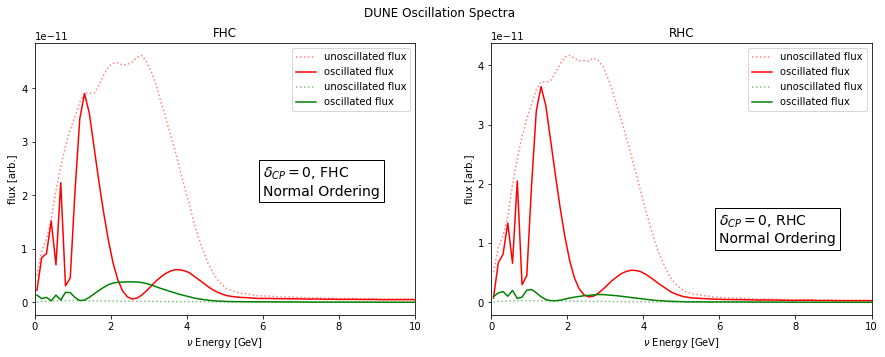

In [145]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('DUNE Oscillation Spectra')
ax1.set_xlim(0,10)
ax2.set_xlim(0,10)
ax1.set_title('FHC')
ax2.set_title(r'RHC')
ax1.set_xlabel(r'$\nu$ Energy [GeV]')
ax1.set_ylabel('flux [arb.]')
ax2.set_xlabel(r'$\nu$ Energy [GeV]')
ax2.set_ylabel('flux [arb.]')
ax1.plot(energies, flux_mu_no, label=r'unoscillated flux', linestyle=':', alpha=0.5, color='red')
ax1.plot(energies, osc_flux_mu_no, label=r'oscillated flux', color='red')

ax1.plot(energies, flux_e_no, label=r'unoscillated flux', linestyle=':', alpha=0.5, color='green')
ax1.plot(energies, osc_flux_e_no, label=r'oscillated flux', color='green')

ax2.plot(energies, flux_mub_no, label=r'unoscillated flux', linestyle=':', alpha=0.5, color='red')
ax2.plot(energies, osc_flux_mub_no, label=r'oscillated flux', color='red')

ax2.plot(energies, flux_eb_no, label=r'unoscillated flux', linestyle=':', alpha=0.5, color='green')
ax2.plot(energies, osc_flux_eb_no, label=r'oscillated flux', color='green')

ax1.text(6, 2e-11, '$\delta_{CP}=0$, FHC\nNormal Ordering', fontsize=14, bbox={'facecolor' : 'white' } )
ax2.text(6, 1e-11, '$\delta_{CP}=0$, RHC\nNormal Ordering', fontsize=14, bbox={'facecolor' : 'white' } )
ax1.legend()
ax2.legend()
fig.savefig(prefix+'signal.png')

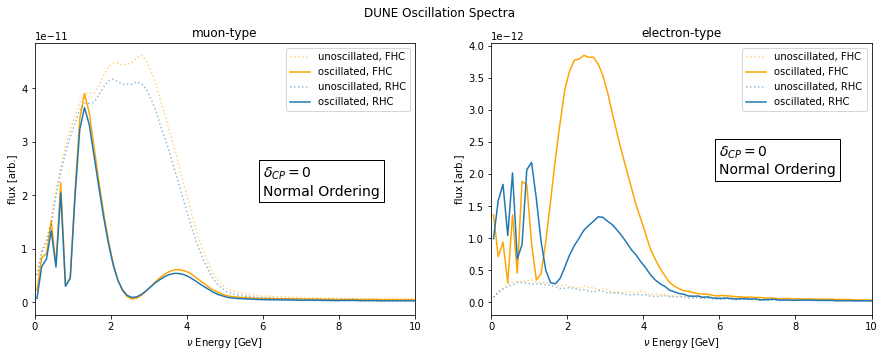

In [146]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('DUNE Oscillation Spectra')
ax1.set_xlim(0,10)
ax2.set_xlim(0,10)
ax1.set_title('muon-type')
ax2.set_title('electron-type')
ax1.set_xlabel(r'$\nu$ Energy [GeV]')
ax1.set_ylabel('flux [arb.]')
ax2.set_xlabel(r'$\nu$ Energy [GeV]')
ax2.set_ylabel('flux [arb.]')

ax1.plot(energies, flux_mu_no, label=r'unoscillated, FHC', linestyle=':', alpha=0.5, color='orange')
ax1.plot(energies, osc_flux_mu_no, label=r'oscillated, FHC', color='orange')

ax2.plot(energies, flux_e_no, label=r'unoscillated, FHC', linestyle=':', alpha=0.5, color='orange')
ax2.plot(energies, osc_flux_e_no, label=r'oscillated, FHC', color='orange')

ax1.plot(energies, flux_mub_no, label=r'unoscillated, RHC', linestyle=':', alpha=0.5, color='tab:blue')
ax1.plot(energies, osc_flux_mub_no, label=r'oscillated, RHC', color='tab:blue')

ax2.plot(energies, flux_eb_no, label=r'unoscillated, RHC', linestyle=':', alpha=0.5, color='tab:blue')
ax2.plot(energies, osc_flux_eb_no, label=r'oscillated, RHC', color='tab:blue')

ax1.text(6, 2e-11, '$\delta_{CP}=0$\nNormal Ordering', fontsize=14, bbox={'facecolor' : 'white' } )
ax2.text(6, 2e-12, '$\delta_{CP}=0$\nNormal Ordering', fontsize=14, bbox={'facecolor' : 'white' } )
ax1.legend()
ax2.legend()
fig.savefig(prefix+'signal.png')

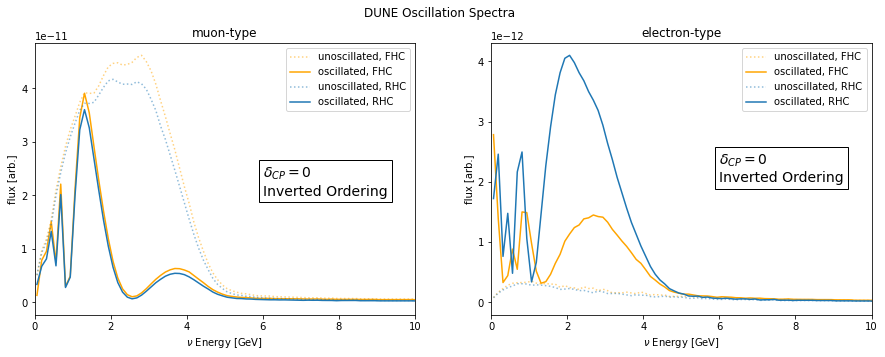

In [147]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('DUNE Oscillation Spectra')
ax1.set_xlim(0,10)
ax2.set_xlim(0,10)
ax1.set_title('muon-type')
ax2.set_title('electron-type')
ax1.set_xlabel(r'$\nu$ Energy [GeV]')
ax1.set_ylabel('flux [arb.]')
ax2.set_xlabel(r'$\nu$ Energy [GeV]')
ax2.set_ylabel('flux [arb.]')

ax1.plot(energies, flux_mu_io, label=r'unoscillated, FHC', linestyle=':', alpha=0.5, color='orange')
ax1.plot(energies, osc_flux_mu_io, label=r'oscillated, FHC', color='orange')

ax2.plot(energies, flux_e_io, label=r'unoscillated, FHC', linestyle=':', alpha=0.5, color='orange')
ax2.plot(energies, osc_flux_e_io, label=r'oscillated, FHC', color='orange')

ax1.plot(energies, flux_mub_io, label=r'unoscillated, RHC', linestyle=':', alpha=0.5, color='tab:blue')
ax1.plot(energies, osc_flux_mub_io, label=r'oscillated, RHC', color='tab:blue')

ax2.plot(energies, flux_eb_io, label=r'unoscillated, RHC', linestyle=':', alpha=0.5, color='tab:blue')
ax2.plot(energies, osc_flux_eb_io, label=r'oscillated, RHC', color='tab:blue')

ax1.text(6, 2e-11, '$\delta_{CP}=0$\nInverted Ordering', fontsize=14, bbox={'facecolor' : 'white' } )
ax2.text(6, 2e-12, '$\delta_{CP}=0$\nInverted Ordering', fontsize=14, bbox={'facecolor' : 'white' } )
ax1.legend()
ax2.legend()
fig.savefig(prefix+'signal.png')

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('DUNE Oscillation Spectra')
ax1.set_xlim(0,10)
ax2.set_xlim(0,10)
ax1.set_title(r'$\nu_{\mu}$')
ax2.set_title(r'$\nu_{e}$')
ax1.set_xlabel(r'$\nu$ Energy [GeV]')
ax1.set_ylabel('flux [arb.]')
ax2.set_xlabel(r'$\nu$ Energy [GeV]')
ax2.set_ylabel('flux [arb.]')
ax1.plot(energies, flux_mu_no, label=r'unoscillated flux', linestyle=':', alpha=0.85)
ax1.plot(energies, osc_flux_mu_no, label=r'oscillated flux', linestyle='--', alpha=0.85)
ax1.plot(energies, sig_mu_no/(sum(sig_mu_no)/sum(osc_flux_mu_no)), label=r'measured (scaled)', alpha=0.85)
ax2.plot(energies, flux_e_no, label=r'unoscillated flux', linestyle=':', alpha=0.85)
ax2.plot(energies, osc_flux_e_no, label=r'oscillated flux', linestyle='--', alpha=0.85)
ax2.plot(energies, sig_e_no/(sum(sig_e_no)/sum(osc_flux_e_no)), label=r'measured (scaled)', alpha=0.85)
ax1.text(6, 2e-11, '$\delta_{CP}=0$, FHC\nNormal Ordering', fontsize=14, bbox={'facecolor' : 'white' } )
ax2.text(6, 2e-12, '$\delta_{CP}=0$, FHC\nNormal Ordering', fontsize=14, bbox={'facecolor' : 'white' } )
ax1.legend()
ax2.legend()
fig.savefig(prefix+'signal.png')

/var/folders/h3/9qqvfgk53qjcf98qsl_2188r0000gn/T/ipykernel_7653/1977775521.py:5: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(energies,np.divide(osc_flux_e_no_dcp_0,osc_flux_eb_no_dcp_0 ), label='0' )
/var/folders/h3/9qqvfgk53qjcf98qsl_2188r0000gn/T/ipykernel_7653/1977775521.py:6: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(energies,np.divide(osc_flux_e_no_dcp_pi2,osc_flux_eb_no_dcp_pi2 ), label='p')
/var/folders/h3/9qqvfgk53qjcf98qsl_2188r0000gn/T/ipykernel_7653/1977775521.py:7: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(energies,np.divide(osc_flux_e_no_dcp_npi2,osc_flux_eb_no_dcp_npi2 ), label='n' )
/var/folders/h3/9qqvfgk53qjcf98qsl_2188r0000gn/T/ipykernel_7653/1977775521.py:14: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(energies,np.divide(sig_e_no_dcp_0,sig_eb_no_dcp_0 ), label='0' )
/var/folders/h3/9qqvfgk53qjcf98qsl_2188r0000gn/T/ipykernel_7653/1977775521.py:14: RuntimeWarning: in

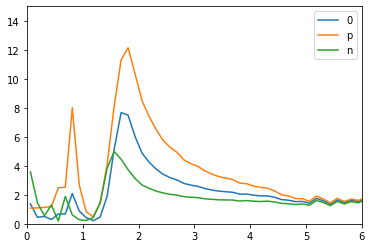

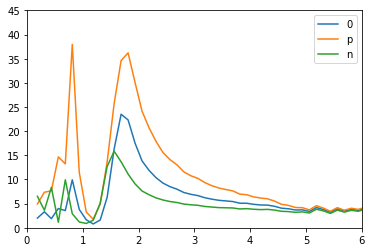

In [169]:
fig=plt.figure()
ax = fig.add_subplot()
ax.set_xlim(0, 6)
ax.set_ylim(0, 15)
plt.plot(energies,np.divide(osc_flux_e_no_dcp_0,osc_flux_eb_no_dcp_0 ), label='0' )
plt.plot(energies,np.divide(osc_flux_e_no_dcp_pi2,osc_flux_eb_no_dcp_pi2 ), label='p')
plt.plot(energies,np.divide(osc_flux_e_no_dcp_npi2,osc_flux_eb_no_dcp_npi2 ), label='n' )
plt.legend()

fig=plt.figure()
ax = fig.add_subplot()
ax.set_xlim(0, 6)
ax.set_ylim(0, 45)
plt.plot(energies,np.divide(sig_e_no_dcp_0,sig_eb_no_dcp_0 ), label='0' )
plt.plot(energies,np.divide(sig_e_no_dcp_pi2,sig_eb_no_dcp_pi2 ), label='p')
plt.plot(energies,np.divide(sig_e_no_dcp_npi2,sig_eb_no_dcp_npi2 ), label='n' )
plt.legend()

In [18]:
#comparison to callums numbers

fosc = root.TFile('DUNE_numu_osc_NuFit5NO.root')


In [19]:
fosc.Print()

TFile: name=DUNE_numu_osc_NuFit5NO.root, title=, option=READ


In [20]:
for key in fosc.GetListOfKeys(): print(key)

Name: numu_FDFHC_flux Title: numu_flux
Name: numu_FDFHC_flux_osc Title: numu_flux
Name: numubar_FDRHC_flux Title: numubar_flux
Name: numubar_FDRHC_flux_osc Title: numu_flux


In [22]:
call_mu_osc = root.TGraph(fosc.Get('numu_FDFHC_flux_osc'))
call_mu = root.TGraph(fosc.Get('numu_FDFHC_flux'))
call_mubar_osc = root.TGraph(fosc.Get('numubar_FDRHC_flux_osc'))
call_mubar = root.TGraph(fosc.Get('numubar_FDRHC_flux'))

8.488463999999999e+23


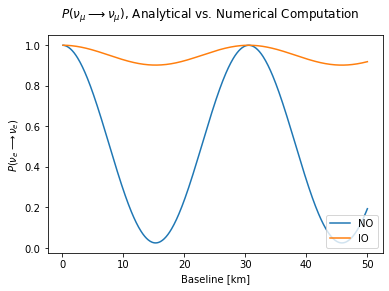

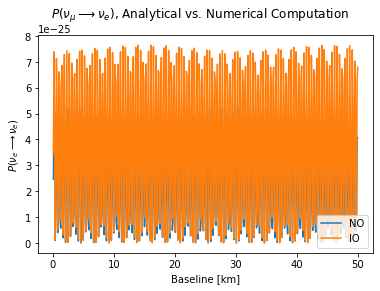

In [46]:
#Fix a baseline, and vary energy and d_cp parameters, compare between calculators. We will use DUNE baseline and ~energies for this
baselines = np.linspace(0.1*km, 50*km, 500)
crust = EarthCrust()
energy = 0.029792*GeV
nu = NuNO_nufit_4()
nuio = NuNO_nufit_4()
nuio.d_cp= 0
nu.d_cp = 0
nuio.theta_23 = nuio.theta_23*2
#nu.dM2_32 = 5*nu.dM2_32
backup = crust.N_e
#crust.N_e = crust.N_e*2
ee_calc = []
mm_calc = []
tt_calc = []
em_calc = []
et_calc = []
mt_calc = []
tm_calc = []
te_calc = []
me_calc = []

ee = []
mm = []
tt = []
em = []
et = []
mt = []
tm = []
te = []
me = []

##define this calculator

calc = Neutrino_Oscillation_Calculator(nu, crust)
calcio = Neutrino_Oscillation_Calculator(nuio, crust)

for baseline in baselines:
    # Units of VCC_EARTH_CRUST: [eV]
        TEV = calcio.Time_Evolution___Flavor(energy, baseline)
        mm.append(np.absolute(TEV[1][1])**2)
        mt.append(np.absolute(TEV[2][1])**2)
        me.append(np.absolute(TEV[0][1])**2)
    
        TEV = calc.Time_Evolution___Flavor(energy, baseline)
        ee_calc.append(np.absolute(TEV[0][0])**2)
        em_calc.append(np.absolute(TEV[1][0])**2)
        et_calc.append(np.absolute(TEV[2][0])**2)
        mm_calc.append(np.absolute(TEV[1][1])**2)
        tt_calc.append(np.absolute(TEV[2][2])**2)
        mt_calc.append(np.absolute(TEV[2][1])**2)
        me_calc.append(np.absolute(TEV[0][1])**2)
        te_calc.append(np.absolute(TEV[0][2])**2)
        tm_calc.append(np.absolute(TEV[1][2])**2)

crust.N_e = backup      

#do the plotting
fig = plt.figure()
fig.suptitle(r'$P(\nu_\mu \longrightarrow \nu_\mu)$, Analytical vs. Numerical Computation')
ax = fig.add_subplot()
ax.plot(baselines/km, mm_calc, label='NO')
ax.plot(baselines/km, mm, label='IO')
#ax.set_xscale('log')
ax.set_xlabel('Baseline [km]')
ax.set_ylabel(r'$P(\nu_e \longrightarrow \nu_e)$')
plt.legend(loc=4)

#do the plotting
fig = plt.figure()
fig.suptitle(r'$P(\nu_\mu \longrightarrow \nu_e)$, Analytical vs. Numerical Computation')
ax = fig.add_subplot()
ax.plot(baselines/km, me_calc, label='NO')
ax.plot(baselines/km, me, label='IO')
#ax.set_xscale('log')
ax.set_xlabel('Baseline [km]')
ax.set_ylabel(r'$P(\nu_e \longrightarrow \nu_e)$')
plt.legend(loc=4)

plt.show()

In [18]:
from Neutrino_Oscillation_Calculator import Neutrino_Oscillation_Calculator

In [44]:
#Fix a baseline, and vary energy and d_cp parameters, compare between calculators. We will use DUNE baseline and ~energies for this
baselines = np.linspace(0.01*km, 25*km, 500)
energy = 0.029792*GeV
nu = NuSterile()
nu.d_cp = 0
nu.a = 0.5
nu.OM4 = 0.1
nu.b = 0.9
backup = crust.N_e
#crust.N_e = crust.N_e*2
ee_calc = []
mm_calc = []
tt_calc = []
em_calc = []
et_calc = []
mt_calc = []
tm_calc = []
te_calc = []
me_calc = []

ee = []
mm = []
tt = []
em = []
et = []
mt = []
tm = []
te = []
me = []
ms = []

##define this calculator

calc = Neutrino_Oscillation_Calculator_Sterile(nu, crust)


##define analytic calculator hamiltonian:
h_vacuum_energy_indep = \
        hamiltonians3nu.hamiltonian_3nu_vacuum_energy_independent(  sin(nu.theta_12),
                                                                    sin(nu.theta_23),
                                                                    sin(nu.theta_13),
                                                                    nu.d_cp,
                                                                    nu.dM2_21,
                                                                    nu.dM2_31)

h_matter = hamiltonians3nu.hamiltonian_3nu_matter(  h_vacuum_energy_indep,
                                                            energy,
                                                            crust.coupling_strength()*nu.mode)

for baseline in baselines:
    # Units of VCC_EARTH_CRUST: [eV]
        Pee, Pem, Pet, Pme, Pmm, Pmt, Pte, Ptm, Ptt = \
            oscprob3nu.probabilities_3nu(h_matter, (baseline/km)*CONV_KM_TO_INV_EV)
        ee.append(Pee)
        mm.append(Pmm)
        tt.append(Ptt)
        et.append(Pet)
        em.append(Pem)
        mt.append(Pmt)
        te.append(Pte)
        me.append(Pme)
        tm.append(Ptm)
    
        TEV = calc.Time_Evolution___Flavor(energy, baseline)
        ee_calc.append(np.absolute(TEV[0][0])**2)
        em_calc.append(np.absolute(TEV[1][0])**2)
        et_calc.append(np.absolute(TEV[2][0])**2)
        mm_calc.append(np.absolute(TEV[1][1])**2)
        tt_calc.append(np.absolute(TEV[2][2])**2)
        mt_calc.append(np.absolute(TEV[2][1])**2)
        me_calc.append(np.absolute(TEV[0][1])**2)
        te_calc.append(np.absolute(TEV[0][2])**2)
        tm_calc.append(np.absolute(TEV[1][2])**2)
        ms.append(np.absolute(TEV[3][2])**2)

crust.N_e = backup      

#do the plotting
fig = plt.figure()
fig.suptitle(r'$P(\nu_\mu \longrightarrow \nu_\mu)$ with Sterile Oscillations')
ax = fig.add_subplot()
ax.plot(baselines/km*1e3, mm_calc, label='sterile')
ax.plot(baselines/km*1e3, mm, label='no sterile')
#ax.set_xscale('log')
ax.set_xlabel('Baseline [m]')
ax.set_ylabel(r'$P(\nu_\mu \longrightarrow \nu_\mu)$')
plt.legend(loc=4)
plt.text(15000, 0.72, '$\delta M_{14} = 0.1$ eV\n'+r'$\theta_{24} = 0.9$', bbox={'facecolor':'white'}, fontsize=14)
fig.savefig(prefix+'sterile.png')

#do the plotting
fig = plt.figure()
fig.suptitle(r'$P(\nu_\mu \longrightarrow \nu_s)$, Analytical vs. Numerical Computation')
ax = fig.add_subplot()
ax.plot(baselines/km*1e3, ms, label='numerical')
#ax.set_xscale('log')
ax.set_xlabel('Baseline [m]')
ax.set_ylabel(r'$P(\nu_\mu \longrightarrow \nu_s)$')
plt.legend(loc=4)

#fig.savefig(prefix+'ee_no.png')

plt.show()

OverflowError: math range error

In [59]:
m_p = 938 # MeV
convert_g_to_mev = 5.61e26
Na = 6.022e23
class Material:
	def __init__(self, A_nuc, Z, rho):
		self.A_nuc = A_nuc
		self.Z = Z
		self.rho = rho#*convert_g_to_mev #g/cm^3 to MeV/cm^3

	def electron_density(self):
		return self.rho*self.Z/(self.A_nuc) #MeV/cm^3 / MeV --> /cm^3

	def coupling_strength(self):
		return sqrt(2)*G_F*self.electron_density()

In [60]:
water = Material(18.0, 10.0, 1.0)
print(water.electron_density())
print(crust.N_e)

0.5555555555555556
8488460000.0


8.488463999999999e+23
8.488463999999999e+23


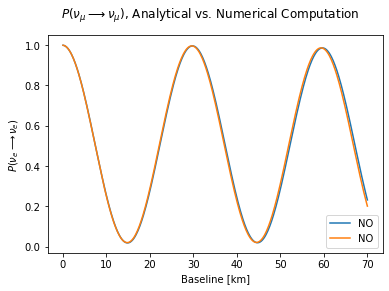

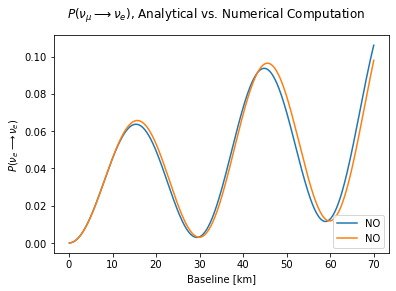

In [31]:
#Fix a baseline, and vary energy and d_cp parameters, compare between calculators. We will use DUNE baseline and ~energies for this
baselines = np.linspace(0.1*km, 70*km, 500)
energy = 0.029792*GeV
nu = NuNO_nufit_4()
nu.mode=-1
nuio = NuIO_nufit_4()
nuio.mode=-1
crust0 = EarthCrust()
crust0.N_e = 0.0#8488460000.0
crust = EarthCrust()
crust.N_e = 8488460000.0
#crust.N_e = 1000*crust.N_e

mm = []
mt = []
me = []

mmio = []
mtio = []
meio = []


##define this calculator

calc = Neutrino_Oscillation_Calculator(nu, crust)
calcio = Neutrino_Oscillation_Calculator(nuio, crust)

for baseline in baselines:
    # Units of VCC_EARTH_CRUST: [eV]
        TEV = calc.Time_Evolution___Flavor(energy, baseline)
        mm.append(np.absolute(TEV[1][1])**2)
        mt.append(np.absolute(TEV[2][1])**2)
        me.append(np.absolute(TEV[0][1])**2)  
        TEVio = calcio.Time_Evolution___Flavor(energy, baseline)
        mmio.append(np.absolute(TEVio[1][1])**2)
        mtio.append(np.absolute(TEVio[2][1])**2)
        meio.append(np.absolute(TEVio[0][1])**2)   


#do the plotting
fig = plt.figure()
fig.suptitle(r'$P(\nu_\mu \longrightarrow \nu_\mu)$, Analytical vs. Numerical Computation')
ax = fig.add_subplot()
ax.plot(baselines/km, mm, label='NO')
ax.plot(baselines/km, mmio, label='NO')
#ax.set_xscale('log')
ax.set_xlabel('Baseline [km]')
ax.set_ylabel(r'$P(\nu_e \longrightarrow \nu_e)$')
plt.legend(loc=4)

#do the plotting
fig = plt.figure()
fig.suptitle(r'$P(\nu_\mu \longrightarrow \nu_e)$, Analytical vs. Numerical Computation')
ax = fig.add_subplot()
ax.plot(baselines/km, me, label='NO')
ax.plot(baselines/km, meio, label='NO')
#ax.set_xscale('log')
ax.set_xlabel('Baseline [km]')
ax.set_ylabel(r'$P(\nu_e \longrightarrow \nu_e)$')
plt.legend(loc=4)

plt.show()